In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

此次分析去去除了部分异常数据，一些特征缺失数据无法成为特征分析选取的依据

In [2]:
path = "./data/易访库20210519.xls"

In [4]:
df_all = pd.read_excel(path)

In [5]:
df_all 

,PROD_ID,TOUCH_FLAG,CALL_TIME,VIP_LEVEL,ONLINE_MONTH,GENDER,IF_BLACK,AGE_SEG,IF_GROUP,IF_SCHOOL,...,CALL_NET_DRTN02,VOICE_CHRG,DATA_CHRG,CALLED_DRTN,CALLED_DRTN01,CALLED_DRTN02,CALL_COUNT,CALLING_DRTN,CALLING_DRTN01,CALLING_DRTN02
0,2.344048e+11,接通成功,2021-04-09 10:42:05,4.0,42.0,1.0,N,30.0,N,N,...,16531.0,1.53,74.13,450.0,362.0,445.0,268.0,459.0,293.0,701.0
1,2.342082e+11,拨打未接通,2021-04-09 10:42:05,5.0,137.0,1.0,N,60.0,N,N,...,15469.0,1.85,92.75,542.0,556.0,419.0,184.0,400.0,600.0,600.0
2,2.342065e+11,接通成功,2021-04-09 10:39:03,5.0,143.0,2.0,N,40.0,N,N,...,2156.0,1.28,56.33,52.0,106.0,109.0,45.0,60.0,160.0,78.0
3,2.343997e+11,拨打未接通,2021-04-09 10:39:03,4.0,46.0,1.0,N,30.0,N,N,...,760.0,-17.70,60.11,204.0,133.0,28.0,166.0,270.0,122.0,29.0
4,2.346437e+11,接通成功,2021-04-09 10:35:31,3.0,18.0,1.0,N,25.0,N,N,...,799.0,1.20,65.41,10.0,43.0,13.0,2.0,3.0,16.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,2.342304e+11,接通成功,2021-04-10 09:07:05,5.0,97.0,1.0,N,45.0,N,N,...,2308.0,0.97,46.72,104.0,29.0,93.0,33.0,121.0,36.0,61.0
22539,2.342278e+11,接通成功,2021-04-10 09:15:48,4.0,98.0,1.0,N,25.0,N,N,...,3030.0,2.30,111.84,140.0,114.0,174.0,71.0,146.0,113.0,132.0
22540,2.343453e+11,接通成功,2021-04-10 09:14:21,4.0,74.0,1.0,N,50.0,N,N,...,8116.0,2.06,94.08,52.0,116.0,99.0,76.0,134.0,243.0,196.0
22541,2.342222e+11,接通成功,2021-04-10 09:19:26,4.0,99.0,1.0,N,45.0,N,N,...,1597.0,2.30,105.54,163.0,111.0,158.0,54.0,139.0,70.0,94.0


In [8]:
df_all.TOUCH_FLAG.groupby()

TypeError: You have to supply one of 'by' and 'level'

In [5]:
# 接通回访的正样本
df_Y = df_all[df_all['TOUCH_FLAG']=='接通成功']
# 接通回访的负样本
df_N = df_all[df_all['TOUCH_FLAG']=='']

In [6]:
print('总样本个数：' + str(len(df_all)))
print('正样本个数：' + str(len(df_Y)))
print('正样本个数：' + str(len(df_N)))

总样本个数：57787
正样本个数：4362
正样本个数：53425


In [8]:
df_Y

,PROD_ID,VIP_LEVEL,ONLINE_MONTH,GENDER,IF_BLACK,AGE_SEG,IF_GROUP,IF_SCHOOL,IF_BRD,IF_DBL_TRMNL,...,DATA_CHRG,CALLED_DRTN,CALLED_DRTN01,CALLED_DRTN02,CALL_COUNT,CALLING_DRTN,CALLING_DRTN01,CALLING_DRTN02,success,IF_TOUCH
1,234401899570,5.0,41,2,N,55,N,N,Y,Y,...,0.00,0,0.0,0.0,0,0,0.0,0.0,0,1
10,234399701744,5.0,43,1,N,45,N,N,Y,Y,...,100.95,3,40.0,25.0,5,8,34.0,31.0,0,1
13,234368345602,5.0,64,2,N,40,N,N,Y,Y,...,0.00,34,21.0,41.0,8,14,18.0,17.0,0,1
17,234207436004,5.0,137,1,N,55,N,N,Y,Y,...,60.11,260,146.0,181.0,71,248,128.0,201.0,0,1
22,234370384834,5.0,61,1,N,50,N,N,Y,Y,...,0.00,0,0.0,0.0,2,4,0.0,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,234404458896,6.0,40,1,N,45,N,N,Y,N,...,0.00,67,80.0,32.0,6,6,52.0,29.0,0,1
9884,234409191495,5.0,36,1,N,35,N,N,Y,Y,...,0.00,19,12.0,11.0,0,0,0.0,0.0,1,1
9926,234390334048,5.0,49,1,N,60,N,N,Y,N,...,111.62,46,26.0,25.0,31,33,21.0,14.0,0,1
9948,234411510567,3.0,36,2,N,30,N,N,Y,Y,...,82.16,250,245.0,186.0,129,315,770.0,655.0,0,1


In [7]:
# 所有的标签字段
tags = df_all.columns

In [8]:
tags

Index(['PROD_ID', 'CALL_MONTH', 'VIP_LEVEL', 'ONLINE_MONTH', 'GENDER',
       'IF_BLACK', 'AGE_SEG', 'IF_GROUP', 'IF_SCHOOL', 'IF_BRD',
       'IF_DBL_TRMNL', 'TRMNL_AGE', 'IF_4G_TRMNL', 'IF_VOLTE', 'BRD_RAX',
       'BRD_ACTIVE_DAYS', 'IF_ITV', 'CHRG', 'DATA_FLOW_AMNT',
       'DATA_FLOW_AMNT01', 'DATA_FLOW_AMNT02', 'CALL_DRTN', 'CALL_DRTN01',
       'CALL_DRTN02', 'DATA_FLOW_AMNT_PRV', 'DATA_FLOW_AMNT_ROAM_PRV',
       'DATA_FLOW_AMNT_ROAM_PRV01', 'DATA_FLOW_AMNT_ROAM_PRV02',
       'DATA_FLOW_AMNT_5G', 'DATA_FLOW_AMNT_4G', 'SMS_COUNT',
       'CALLING_NET_COUNT', 'CALL_NET_DRTN', 'VOICE_CHRG', 'DATA_CHRG',
       'CALLED_DRTN', 'CALLED_DRTN01', 'CALLED_DRTN02', 'CALLED_DRTN03',
       'CALL_COUNT', 'CALLING_DRTN01', 'CALLING_DRTN02', 'CALLING_DRTN03',
       'IF_TOUCH', '判断'],
      dtype='object')

In [9]:
def compulete_count_normalized(data, min_v, max_v, space, label='counts'):
    """
    统计一列中各个区间中数值的个数和其对应归一化的值
    data: 列的Series形式
    min_v: 区间最小值
    max_v: 区间最大值
    space： 区间间隔
    """
    # 处理最大、最小值
    if max_v % 10 > 0:
        max_v = max_v - (max_v % 10) + 10
    if min_v % 10 > 0:
        min_v = min_v - (min_v % 10)
    # 需要分段的区间
    sections = [x for x in range(min_v, max_v, space)]
    # 每个区间中的个数
    counts = []
    # 每个区间中的个数的比例即归一化
    counts_normalize = []
    for i in range(0, len(sections)-1):
        # 区间中个数统计
        part_count = data.value_counts(bins=[sections[i], sections[i+1]-1])
        part_count_normalize = data.value_counts(bins=[sections[i], sections[i+1]-1], normalize=True)
        counts.append(part_count)
        counts_normalize.append(part_count_normalize)
    # 合并Series
    result1 = pd.DataFrame(pd.concat([x for x in counts]))
    result2 = pd.DataFrame(pd.concat([x for x in counts_normalize]))
    # 对列的标签进行重命名
    result1.rename(columns={result1.columns[0]:label},inplace=True)
    result2.rename(columns={result2.columns[0]:'normalized'}, inplace=True)
    # 合并两个表
    result = pd.concat([result1, result2], axis=1)
    return result

In [10]:
def compulete_count_normalized_categories(data):
    """
    统计类别的个数及其归一化值
    """
    counts = data.value_counts()
    counts_normalize = data.value_counts(normalize=True)
    # 合并Series
    result1 = pd.DataFrame(counts)
    result2 = pd.DataFrame(counts_normalize)
    # 对列的标签进行重命名
    result1.rename(columns={result1.columns[0]:'counts'},inplace=True)
    result2.rename(columns={result2.columns[0]:'normalized'}, inplace=True)
    # 合并两个表
    result = pd.concat([result1, result2], axis=1)
    return result

In [11]:
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']

# 对VIP_LEVEL的统计分析 

In [12]:
df_all.VIP_LEVEL.min()

0

In [13]:
df_all.VIP_LEVEL.max()

7

In [14]:
all_vip_level = compulete_count_normalized_categories(df_all.VIP_LEVEL)
y_vip_level = compulete_count_normalized_categories(df_Y.VIP_LEVEL)
n_vip_level = compulete_count_normalized_categories(df_N.VIP_LEVEL)

In [15]:
all_vip_level

,counts,normalized
4,14217,0.246024
0,11167,0.193244
3,9419,0.162995
5,8348,0.144462
2,6696,0.115874
1,6665,0.115337
6,970,0.016786
7,305,0.005278


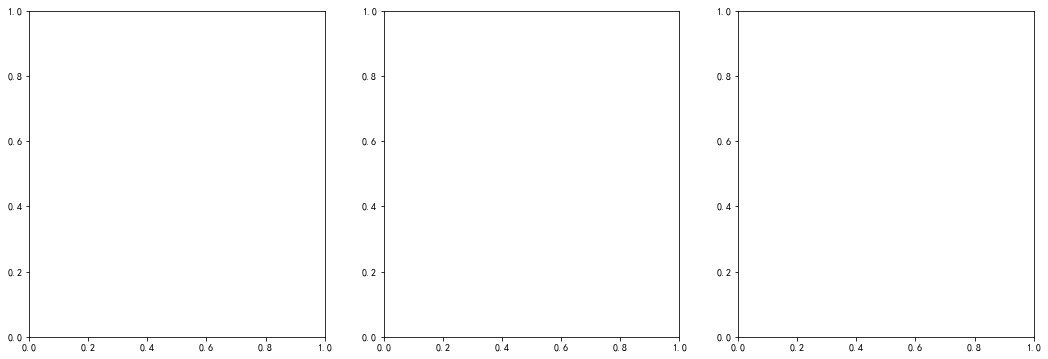

In [16]:
fig,axes = plt.subplots(1, 3, figsize=(18, 6))

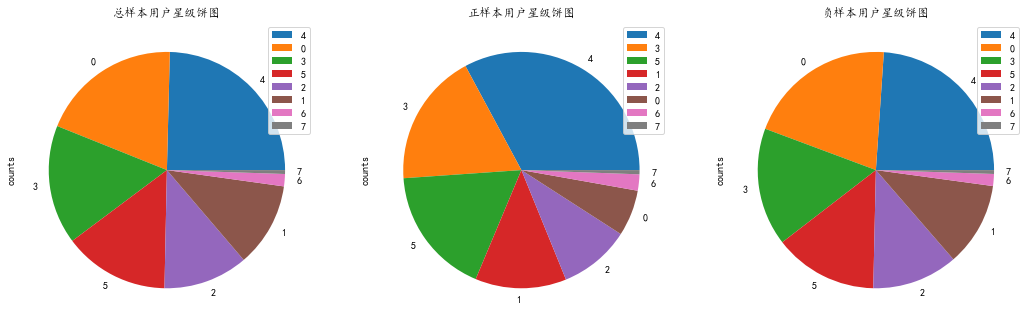

In [17]:
all_vip_level.plot(kind="pie", y="counts", title='总样本用户星级饼图', ax=axes[0])
y_vip_level.plot.pie(y="counts",title='正样本用户星级饼图', ax=axes[1])
n_vip_level.plot.pie(y="counts",title='负样本用户星级饼图', ax=axes[2])
fig

总样本与正样本分布相近，且正样本中分布较为平均，分析价值不大

# 对ONLINE_MONTH的统计分析

In [18]:
all_result = compulete_count_normalized(df_all.ONLINE_MONTH, 0, 200, 10)
Y_result = compulete_count_normalized(df_Y.ONLINE_MONTH, 0, 200, 10)
N_result = compulete_count_normalized(df_N.ONLINE_MONTH, 0, 200, 10)

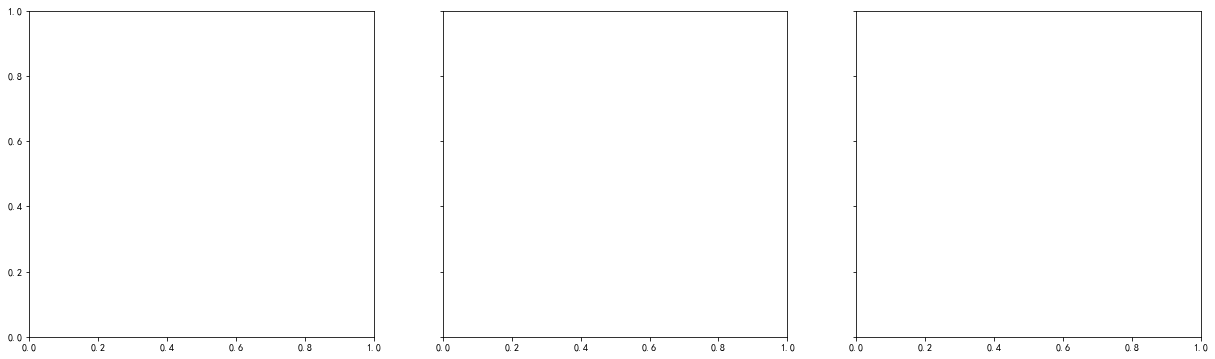

In [19]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6),sharey=True)

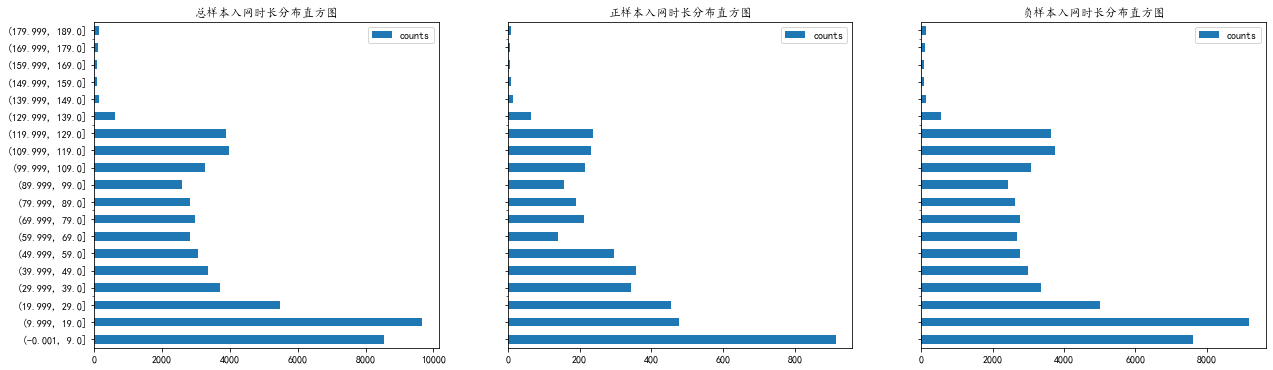

In [20]:
all_result.plot.barh(y="counts",title='总样本入网时长分布直方图', ax=axes[0])
Y_result.plot.barh(y="counts",title='正样本入网时长分布直方图', ax=axes[1])
N_result.plot.barh(y="counts",title='负样本入网时长分布直方图', ax=axes[2])
fig

# 对GENDER的统计分析

In [21]:
all_gender_result = compulete_count_normalized_categories(df_all.GENDER)
y_gender_result = compulete_count_normalized_categories(df_Y.GENDER)
n_gender_result = compulete_count_normalized_categories(df_N.GENDER)

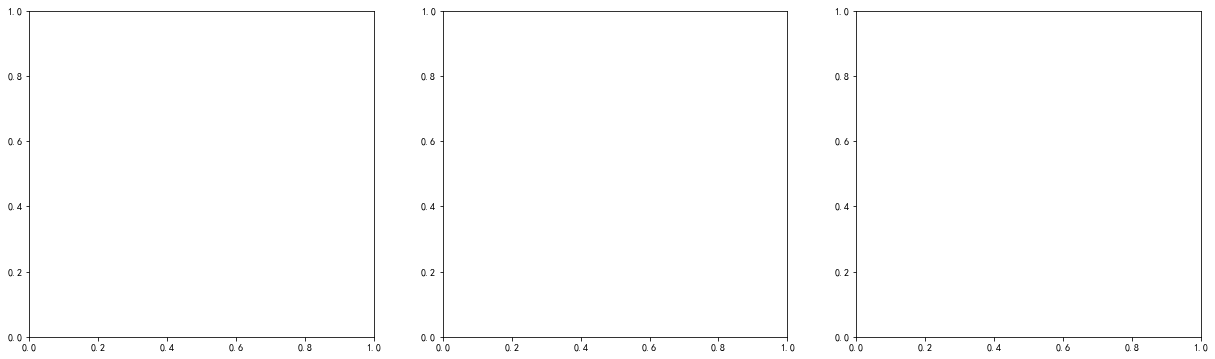

In [22]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6))

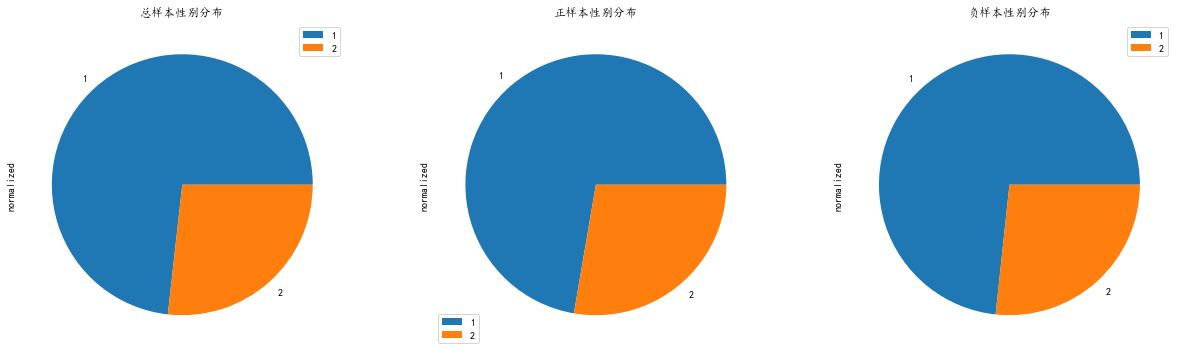

In [23]:
all_gender_result.plot.pie(y='normalized',title='总样本性别分布', ax=axes[0])
y_gender_result.plot.pie(y='normalized',  title='正样本性别分布', ax=axes[1])
n_gender_result.plot.pie(y='normalized',  title='负样本性别分布', ax=axes[2])
fig

# 对AGE_SEG的统计分析

In [24]:
all_age_result = compulete_count_normalized(df_all.AGE_SEG, 10, 100, 5)
y_age_result = compulete_count_normalized(df_Y.AGE_SEG, 10, 100, 5)
n_age_result = compulete_count_normalized(df_N.AGE_SEG, 10, 100, 5)

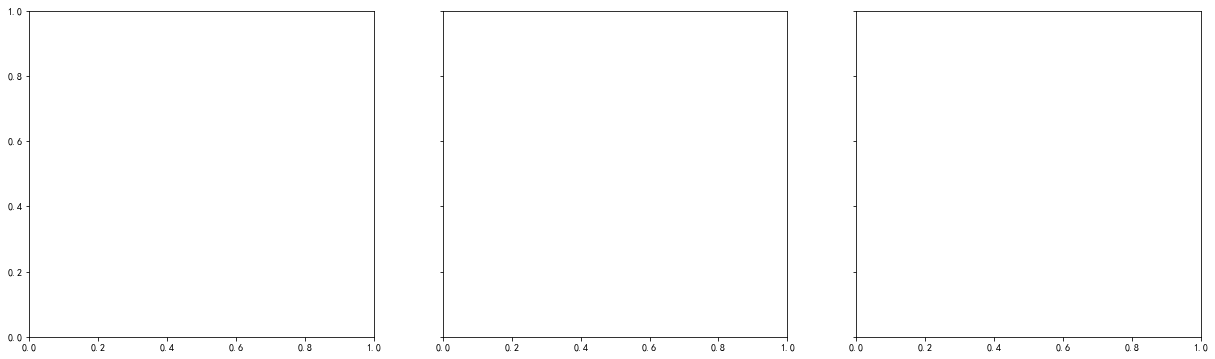

In [25]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6),sharey=True)

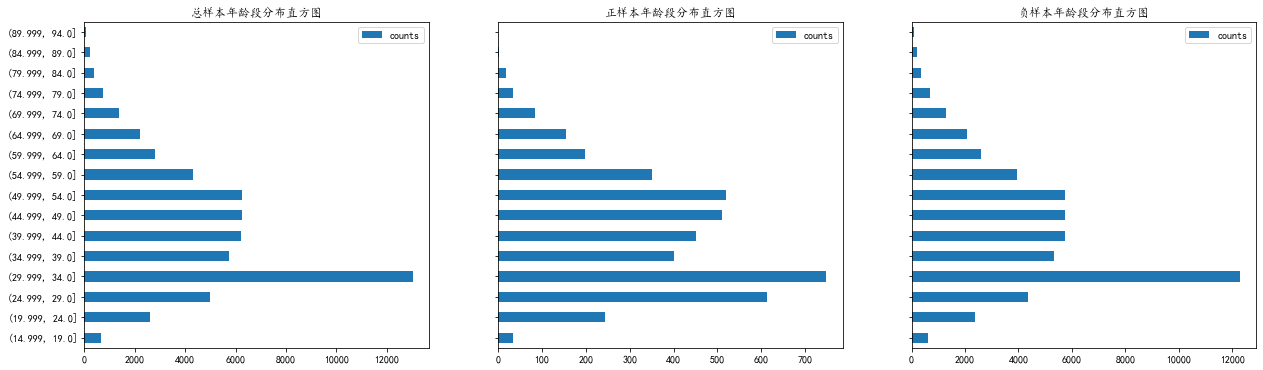

In [26]:
all_age_result.plot.barh(y="counts", title='总样本年龄段分布直方图', ax=axes[0])
y_age_result.plot.barh(y="counts", title='正样本年龄段分布直方图', ax=axes[1])
n_age_result.plot.barh(y="counts", title='负样本年龄段分布直方图', ax=axes[2])
fig

总样本年龄段数据采集不均衡，当前分析主要年段集中在20——60岁， 参考价值不大

# 对IF_GROUP的统计分析

In [27]:
all_if_group = compulete_count_normalized_categories(df_all.IF_GROUP)
y_if_group = compulete_count_normalized_categories(df_Y.IF_GROUP)
n_if_group = compulete_count_normalized_categories(df_N.IF_GROUP)

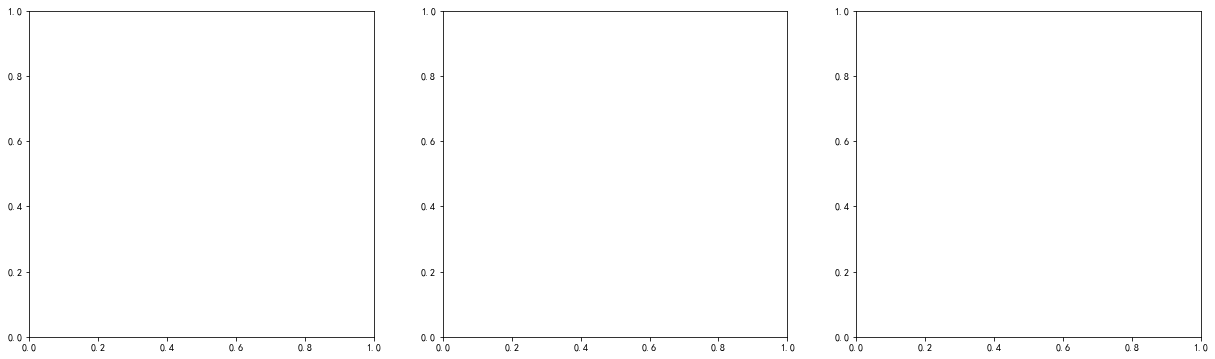

In [28]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6))

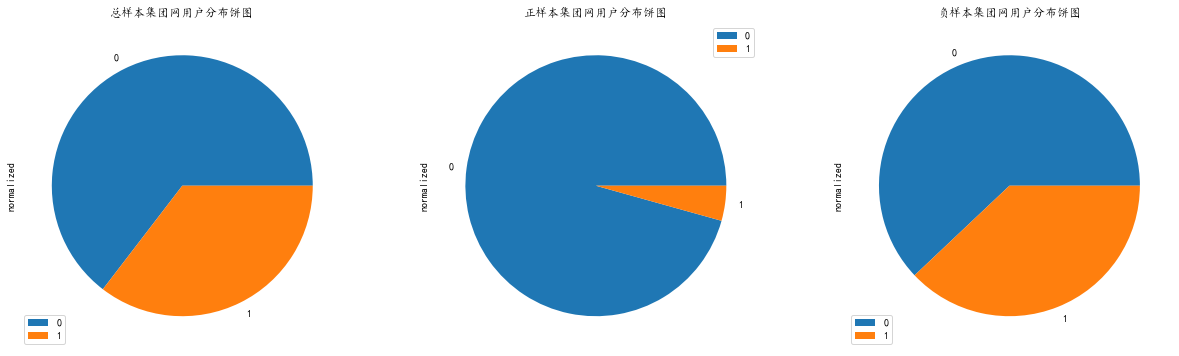

In [29]:
all_if_group.plot.pie(y="normalized", title='总样本集团网用户分布饼图', ax=axes[0])
y_if_group.plot.pie(y="normalized", title='正样本集团网用户分布饼图', ax=axes[1])
n_if_group.plot.pie(y="normalized", title='负样本集团网用户分布饼图', ax=axes[2])
fig

正样本中非集团用户比例相比于总样本有所增大，具有分析价值。

# 对IF_SCHOOL的统计分析

In [31]:
all_if_school = compulete_count_normalized_categories(df_all.IF_SCHOOL)
y_if_school = compulete_count_normalized_categories(df_Y.IF_SCHOOL)
n_if_school = compulete_count_normalized_categories(df_N.IF_SCHOOL)

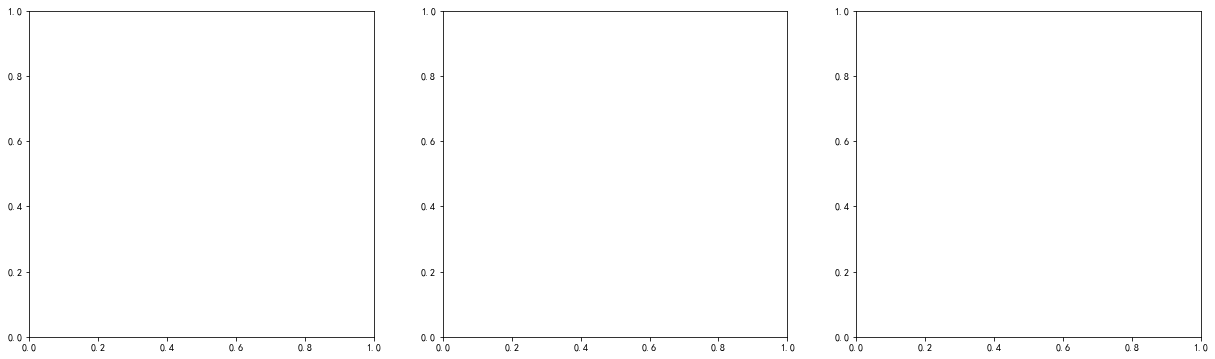

In [32]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6))

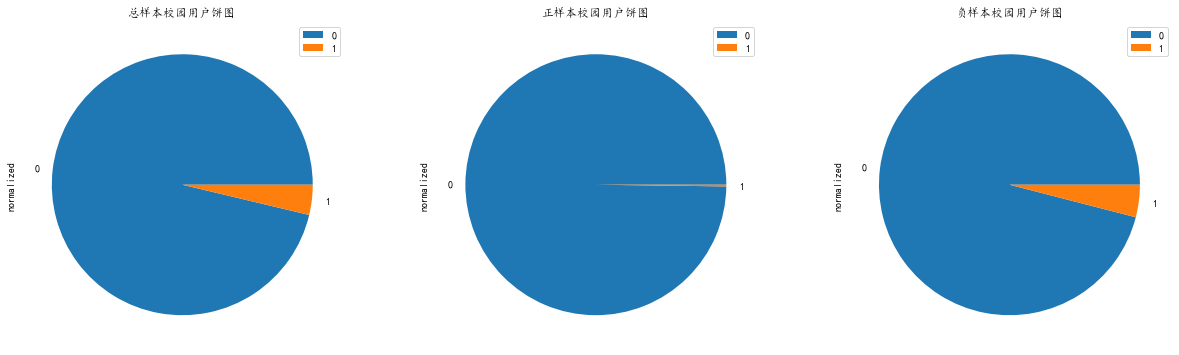

In [33]:
all_if_school.plot.pie(y="normalized", title='总样本校园用户饼图', ax=axes[0])
y_if_school.plot.pie(y="normalized", title='正样本校园用户饼图', ax=axes[1])
n_if_school.plot.pie(y="normalized", title='负样本校园用户饼图', ax=axes[2])
fig

# 对IF_BRD的统计分析

In [35]:
all_if_brd = compulete_count_normalized_categories(df_all.IF_BRD)
y_if_brd = compulete_count_normalized_categories(df_Y.IF_BRD)
n_if_brd = compulete_count_normalized_categories(df_N.IF_BRD)

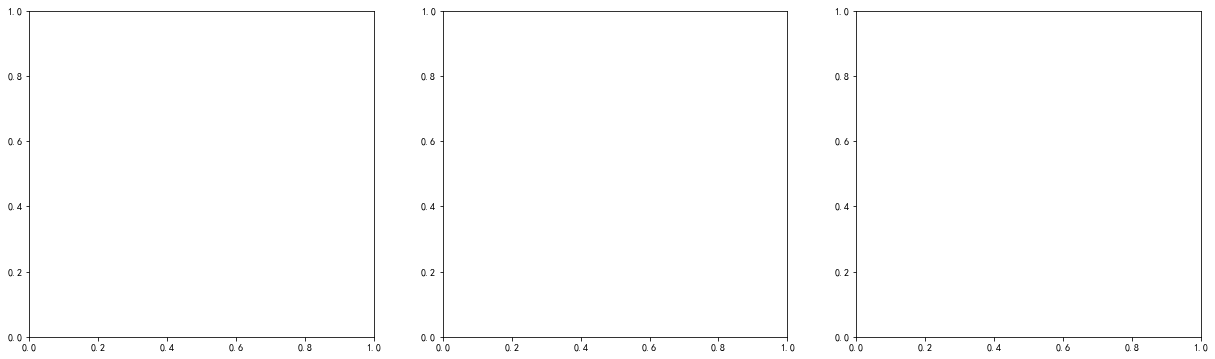

In [36]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6))

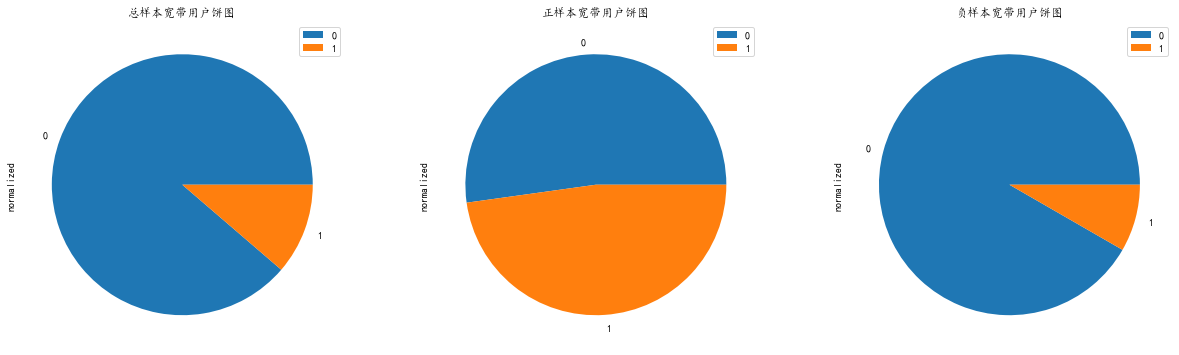

In [37]:
all_if_brd.plot.pie(y="normalized", title='总样本宽带用户饼图', ax=axes[0])
y_if_brd.plot.pie(y="normalized", title='正样本宽带用户饼图', ax=axes[1])
n_if_brd.plot.pie(y="normalized", title='负样本宽带用户饼图', ax=axes[2])
fig

宽带用户在正样本中有所增大，具有分析价值。

# 对BRD_RAX的统计分析

In [38]:
all_brd_rax = compulete_count_normalized(df_all.BRD_RAX, 0, 600, 30)
y_brd_rax = compulete_count_normalized(df_Y.BRD_RAX, 0, 600, 30)
n_brd_rax = compulete_count_normalized(df_N.BRD_RAX, 0, 600, 30)

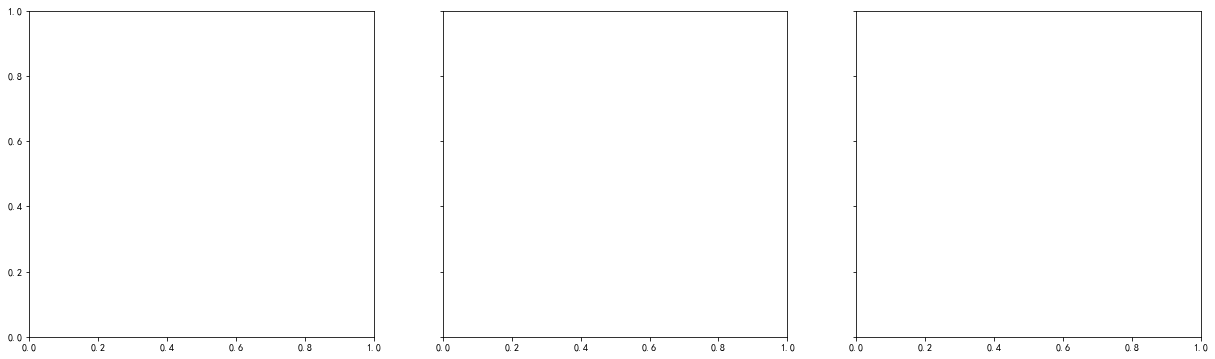

In [39]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

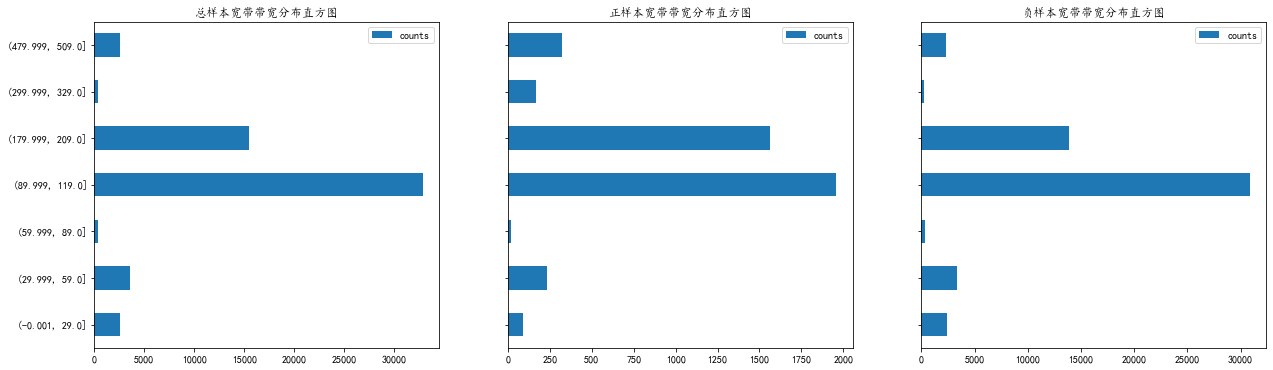

In [40]:
all_brd_rax.plot.barh(y="counts", title='总样本宽带带宽分布直方图', ax=axes[0])
y_brd_rax.plot.barh(y="counts", title='正样本宽带带宽分布直方图', ax=axes[1])
n_brd_rax.plot.barh(y="counts", title='负样本宽带带宽分布直方图', ax=axes[2])
fig

# 对BRD_ACTIVE_DAYS的统计分析

In [41]:
all_brd_active_days = compulete_count_normalized(df_all.BRD_ACTIVE_DAYS, 0, 36, 5)
y_brd_active_days = compulete_count_normalized(df_Y.BRD_ACTIVE_DAYS, 0, 36, 5)
n_brd_active_days = compulete_count_normalized(df_N.BRD_ACTIVE_DAYS, 0, 36, 5)

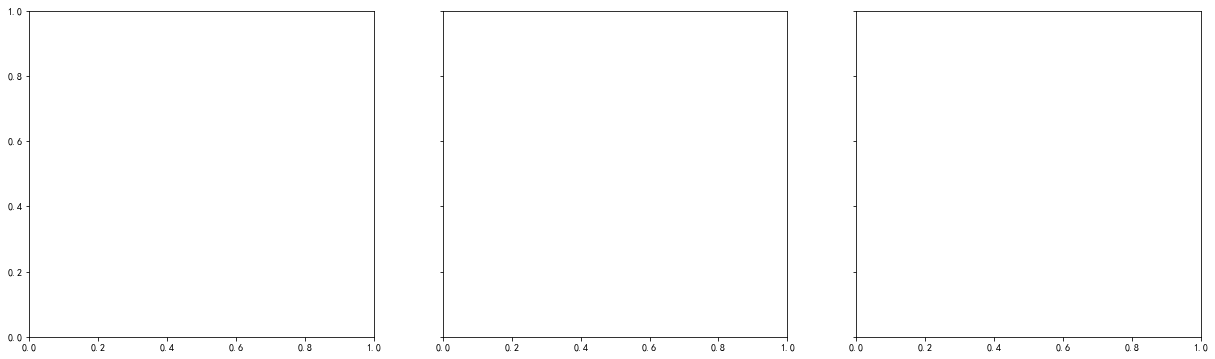

In [42]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

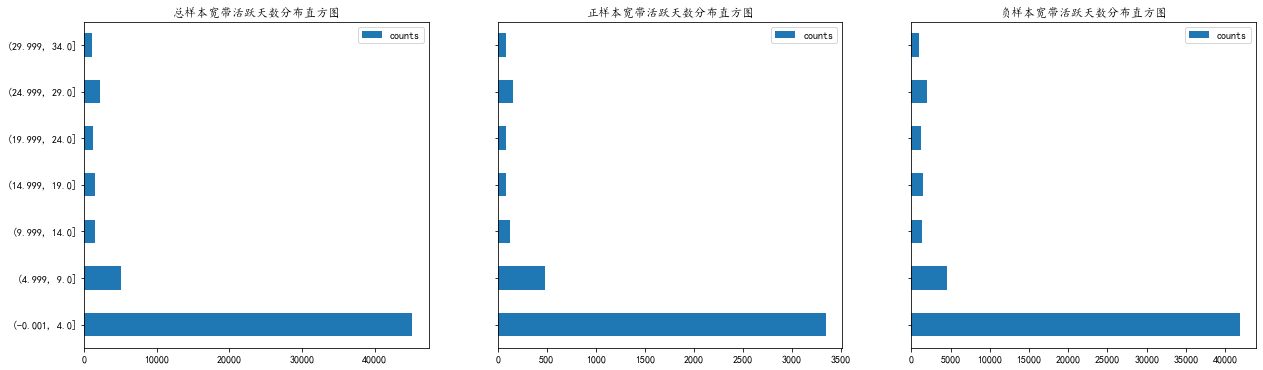

In [43]:
all_brd_active_days.plot.barh(y="counts", title='总样本宽带活跃天数分布直方图', ax=axes[0])
y_brd_active_days.plot.barh(y="counts", title='正样本宽带活跃天数分布直方图', ax=axes[1])
n_brd_active_days.plot.barh(y="counts", title='负样本宽带活跃天数分布直方图', ax=axes[2])
fig

总样本数据采集不均衡，月宽带活跃天数在5天以下的占比重较大

# 对IF_ITV的统计分析

In [44]:
all_if_ITV = compulete_count_normalized_categories(df_all.IF_ITV)
y_if_ITV = compulete_count_normalized_categories(df_Y.IF_ITV)
n_if_ITV = compulete_count_normalized_categories(df_N.IF_ITV)

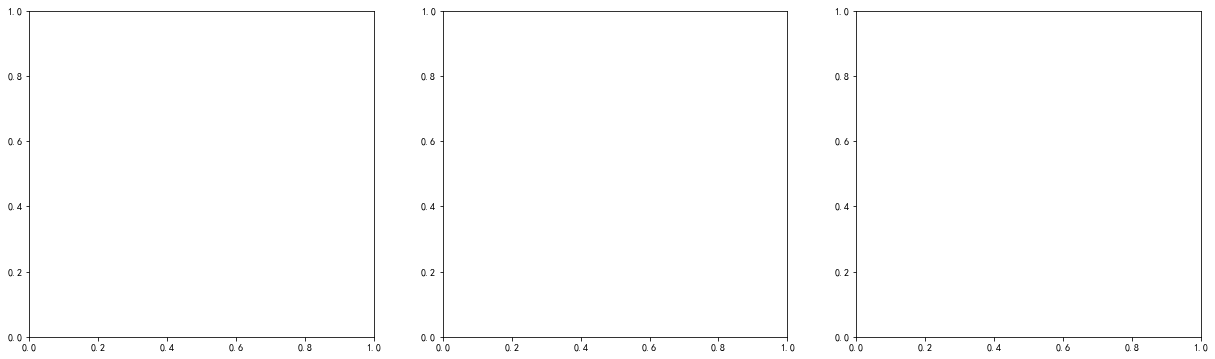

In [45]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6))

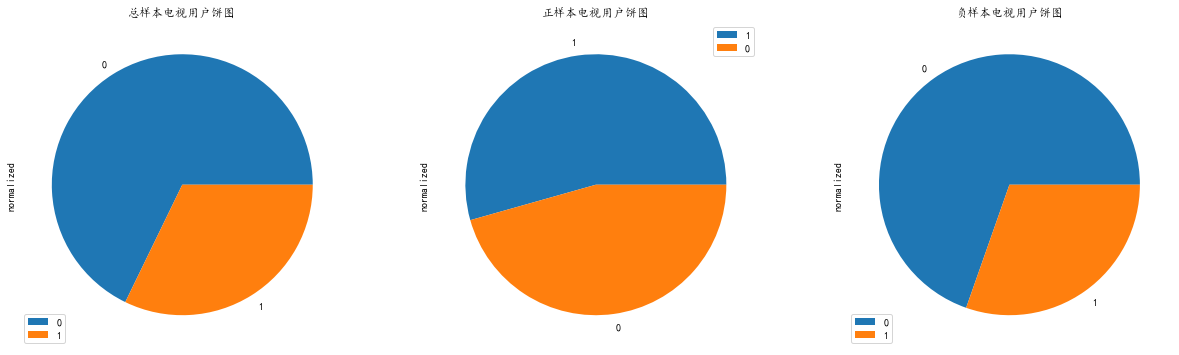

In [46]:
all_if_ITV.plot.pie(y="normalized", title='总样本电视用户饼图', ax=axes[0])
y_if_ITV.plot.pie(y="normalized", title='正样本电视用户饼图', ax=axes[1])
n_if_ITV.plot.pie(y="normalized", title='负样本电视用户饼图', ax=axes[2])
fig

该特征具有分析价值。

# 对IF_DBL_TRMNL的统计分析

In [48]:
all_if_dbl_tamnl = compulete_count_normalized_categories(df_all.IF_DBL_TRMNL)
y_if_dbl_tamnl = compulete_count_normalized_categories(df_Y.IF_DBL_TRMNL)
n_if_dbl_tamnl = compulete_count_normalized_categories(df_N.IF_DBL_TRMNL)

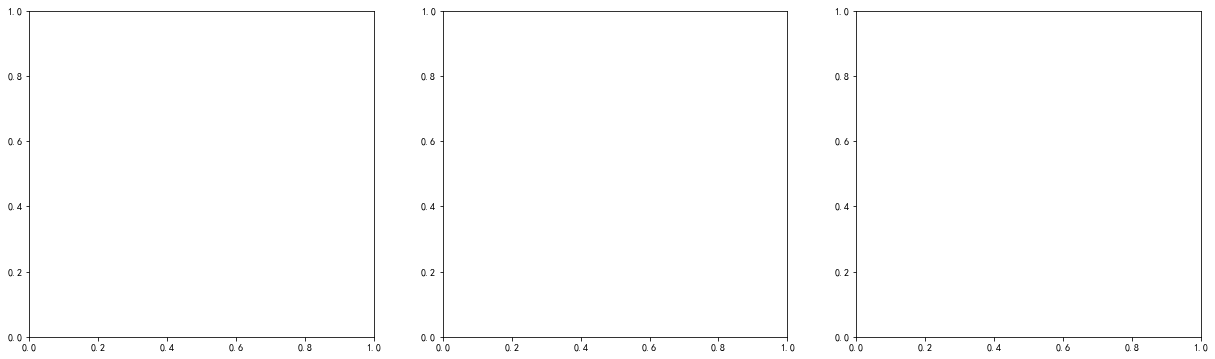

In [49]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6))

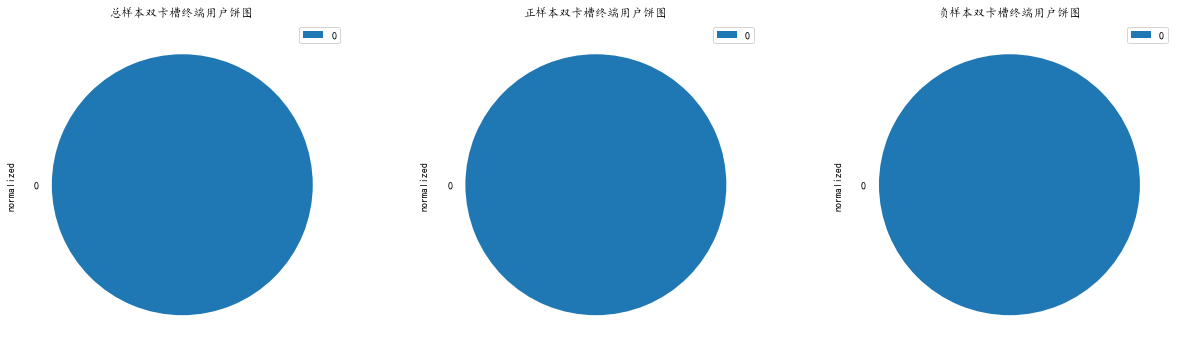

In [50]:
all_if_dbl_tamnl.plot.pie(y="normalized", title='总样本双卡槽终端用户饼图', ax=axes[0])
y_if_dbl_tamnl.plot.pie(y="normalized", title='正样本双卡槽终端用户饼图', ax=axes[1])
n_if_dbl_tamnl.plot.pie(y="normalized", title='负样本双卡槽终端用户饼图', ax=axes[2])
fig

# 对IF_4G_TRMNL的统计分析

In [51]:
all_if_4g_trmnl = compulete_count_normalized_categories(df_all.IF_4G_TRMNL)
y_if_4g_trmnl = compulete_count_normalized_categories(df_Y.IF_4G_TRMNL)
n_if_4g_trmnl = compulete_count_normalized_categories(df_N.IF_4G_TRMNL)

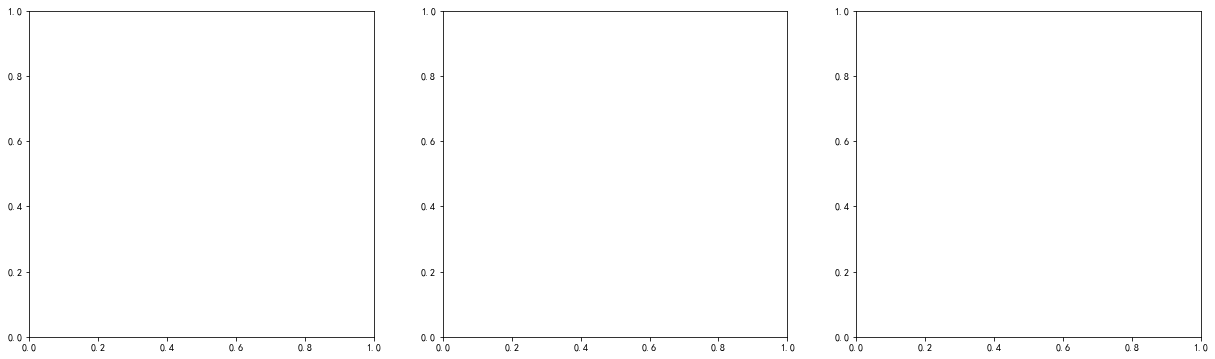

In [52]:
fig,axes = plt.subplots(1, 3, figsize=(21, 6))

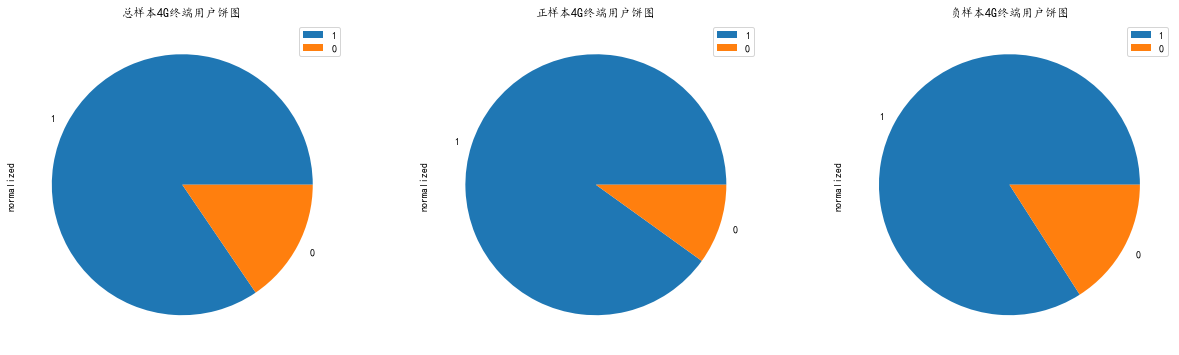

In [53]:
all_if_4g_trmnl.plot.pie(y="normalized", title='总样本4G终端用户饼图', ax=axes[0])
y_if_4g_trmnl.plot.pie(y="normalized", title='正样本4G终端用户饼图', ax=axes[1])
n_if_4g_trmnl.plot.pie(y="normalized", title='负样本4G终端用户饼图', ax=axes[2])
fig

总样本与正样本分布比例相近，该特征参考价值不大

# 对TRMNL_AGE的统计分析

In [54]:
all_trmnl_age = compulete_count_normalized(df_all.TRMNL_AGE, 0, 30, 3)
y_trmnl_age = compulete_count_normalized(df_Y.TRMNL_AGE, 0, 30, 3)
n_trmnl_age = compulete_count_normalized(df_N.TRMNL_AGE, 0, 30, 3)

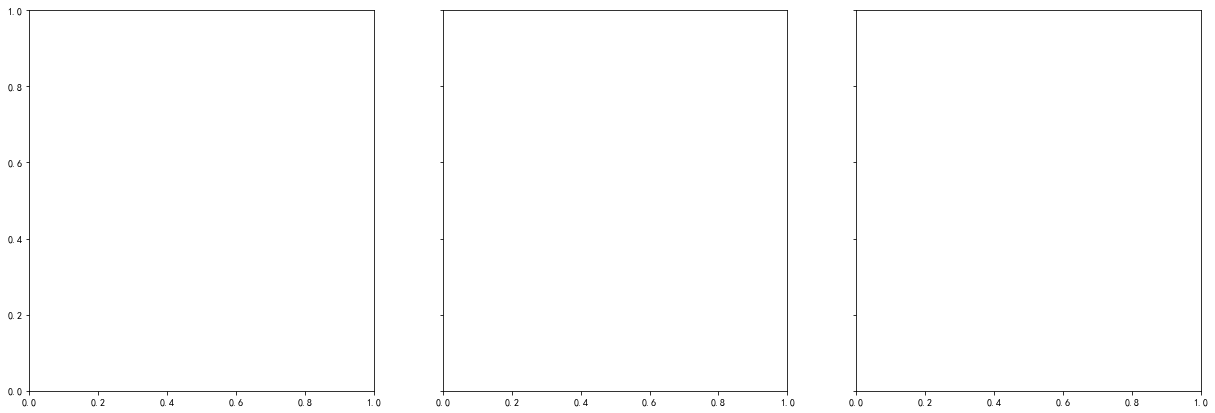

In [55]:
fig,axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

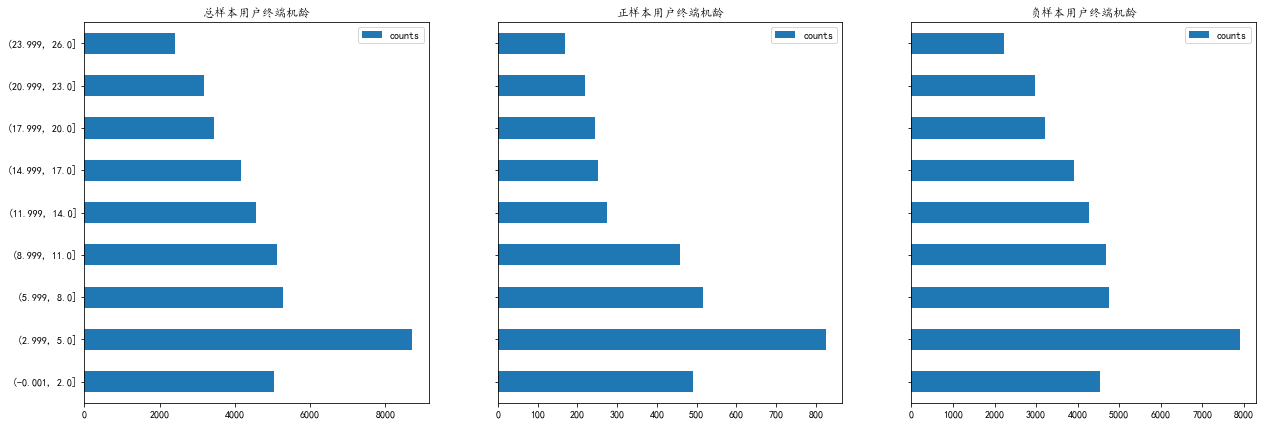

In [56]:
all_trmnl_age.plot.barh(y="counts", title='总样本用户终端机龄', ax=axes[0])
y_trmnl_age.plot.barh(y="counts", title='正样本用户终端机龄', ax=axes[1])
n_trmnl_age.plot.barh(y="counts", title='负样本用户终端机龄', ax=axes[2])
fig

总样本与正样本分布比例相近

# 对IF_VOLTE的统计分析

In [57]:
all_if_volte = compulete_count_normalized_categories(df_all.IF_VOLTE)
y_if_volte = compulete_count_normalized_categories(df_Y.IF_VOLTE)
n_if_volte = compulete_count_normalized_categories(df_N.IF_VOLTE)

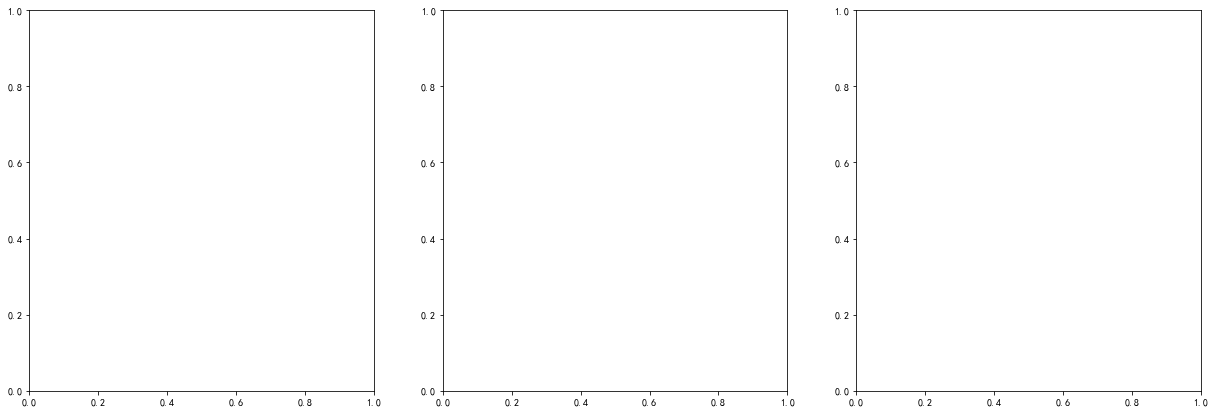

In [62]:
fig,axes = plt.subplots(1, 3, figsize=(21, 7))

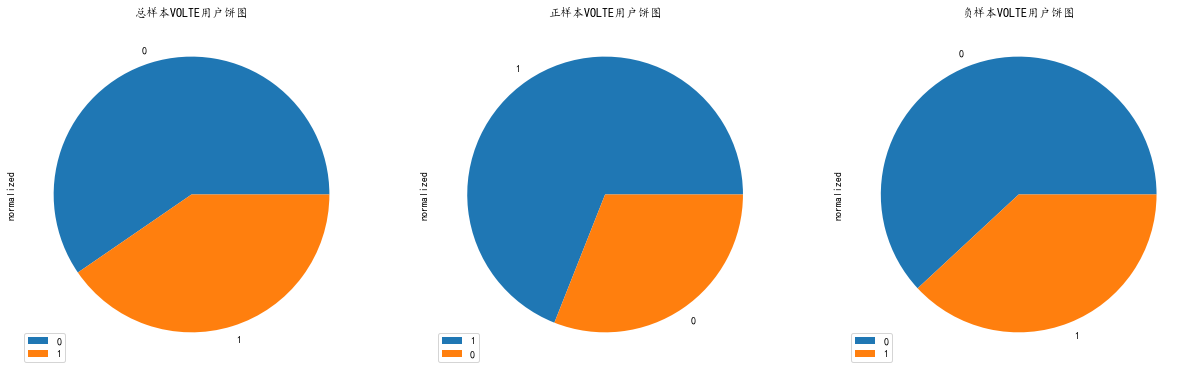

In [63]:
all_if_volte.plot.pie(y="normalized", title='总样本VOLTE用户饼图', ax=axes[0])
y_if_volte.plot.pie(y="normalized", title='正样本VOLTE用户饼图', ax=axes[1])
n_if_volte.plot.pie(y="normalized", title='负样本VOLTE用户饼图', ax=axes[2])
fig

总样本与正样本分布比例相近

# 对BRD_ACTIVE_DAYS的统计分析

In [64]:
all_brd_active_days = compulete_count_normalized(df_all.BRD_ACTIVE_DAYS, 0, 40, 5)
y_brd_active_days = compulete_count_normalized(df_Y.BRD_ACTIVE_DAYS, 0, 40, 5)
n_brd_active_days = compulete_count_normalized(df_N.BRD_ACTIVE_DAYS, 0, 40, 5)

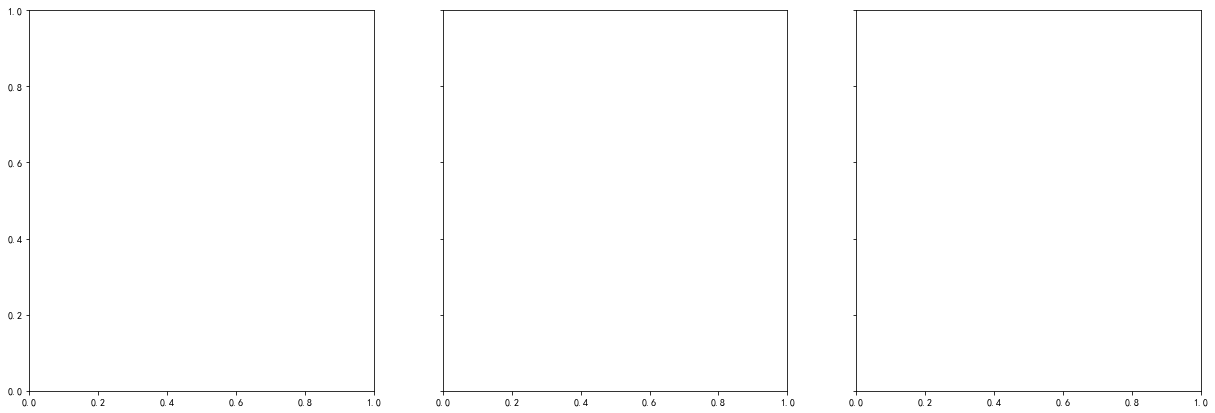

In [65]:
fig,axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

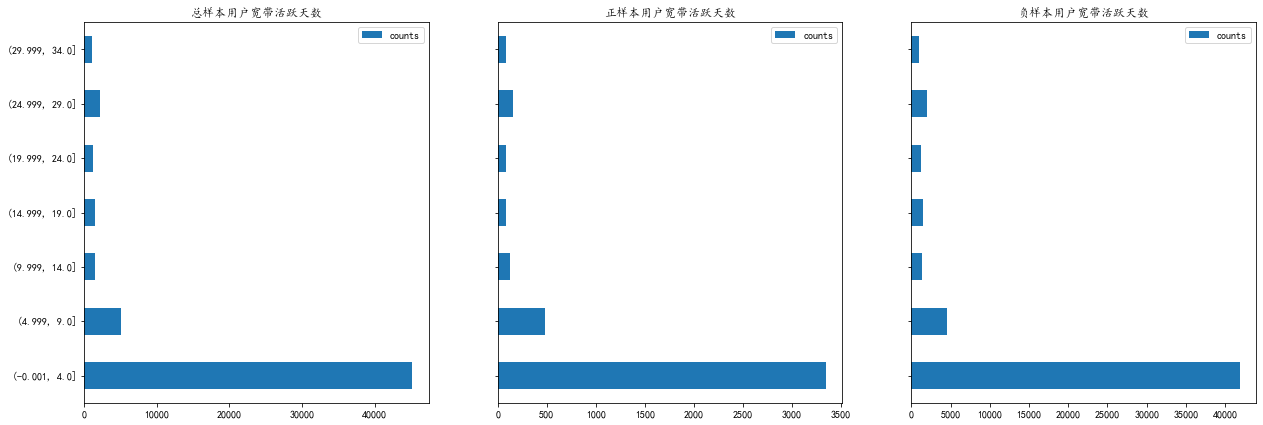

In [66]:
all_brd_active_days.plot.barh(y="counts", title='总样本用户宽带活跃天数', ax=axes[0])
y_brd_active_days.plot.barh(y="counts", title='正样本用户宽带活跃天数', ax=axes[1])
n_brd_active_days.plot.barh(y="counts", title='负样本用户宽带活跃天数', ax=axes[2])
fig

总样本和正样本用户的宽带活跃天数都集中在四天内

# 对CHRG的统计分析

In [67]:
df_all.CHRG.max()

2047.41

In [68]:
all_chrg = compulete_count_normalized(df_all.CHRG, 0, 40, 5)
y_chrg = compulete_count_normalized(df_Y.CHRG, 0, 40, 5)
n_chrg = compulete_count_normalized(df_N.CHRG, 0, 40, 5)

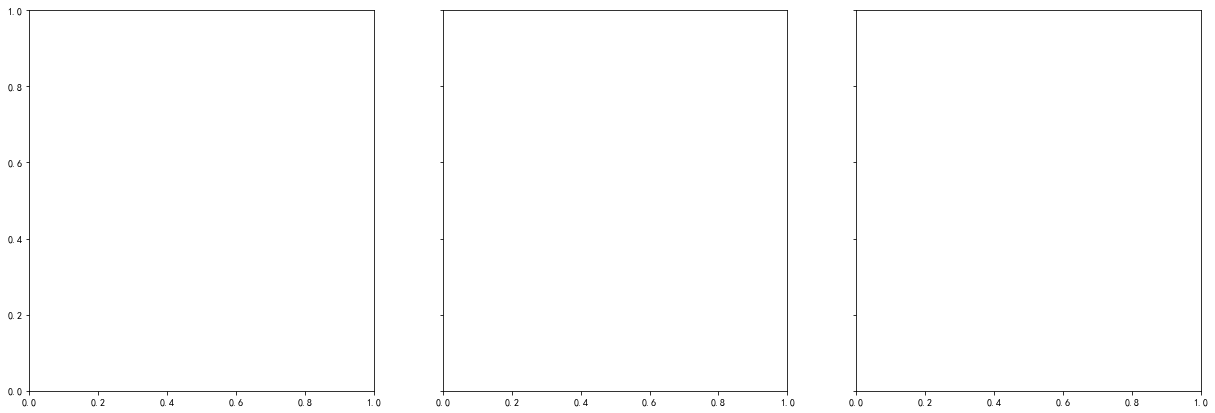

In [69]:
fig,axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

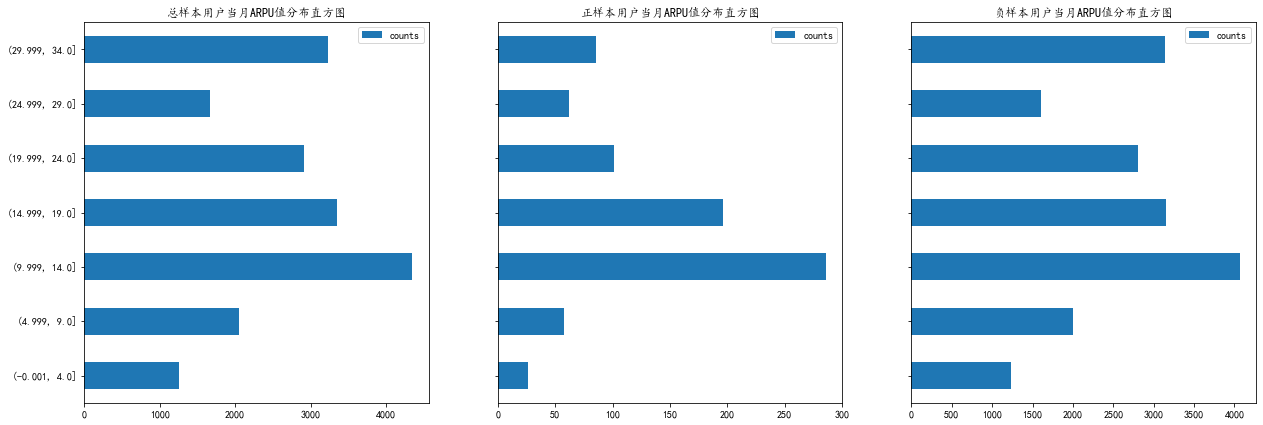

In [70]:
all_chrg.plot.barh(y="counts", title='总样本用户当月ARPU值分布直方图', ax=axes[0])
y_chrg.plot.barh(y="counts", title='正样本用户当月ARPU值分布直方图', ax=axes[1])
n_chrg.plot.barh(y="counts", title='负样本用户当月ARPU值分布直方图', ax=axes[2])
fig

# DATA_FLOW_AMNT

In [71]:
all_data_flow_amnt = compulete_count_normalized(df_all.DATA_FLOW_AMNT, 0, 100000,5000, '当月')
y_data_flow_amnt = compulete_count_normalized(df_Y.DATA_FLOW_AMNT, 0, 100000,5000, '当月')
n_data_flow_amnt = compulete_count_normalized(df_N.DATA_FLOW_AMNT, 0, 100000,5000, '当月')

all_data_flow_amnt01 = compulete_count_normalized(df_all.DATA_FLOW_AMNT01, 0, 100000,5000, '上月')
y_data_flow_amnt01 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT01, 0, 100000,5000, '上月')
n_data_flow_amnt01 = compulete_count_normalized(df_N.DATA_FLOW_AMNT01, 0, 100000,5000, '上月')

all_data_flow_amnt02 = compulete_count_normalized(df_all.DATA_FLOW_AMNT02, 0, 100000,5000, '上上月')
y_data_flow_amnt02 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT02, 0, 100000,5000, '上上月')
n_data_flow_amnt02 = compulete_count_normalized(df_N.DATA_FLOW_AMNT02, 0, 100000,5000, '上上月')

In [72]:
concat_all_data_flow_amnt = pd.concat([all_data_flow_amnt.当月, all_data_flow_amnt01.上月, all_data_flow_amnt02.上上月] ,axis=1)
concat_all_data_flow_amnt = concat_all_data_flow_amnt.reindex([(x.right+1) for x in concat_all_data_flow_amnt.index])

concat_y_data_flow_amnt = pd.concat([y_data_flow_amnt.当月, y_data_flow_amnt01.上月, y_data_flow_amnt02.上上月] ,axis=1)
concat_y_data_flow_amnt = concat_y_data_flow_amnt.reindex([(x.right+1) for x in concat_y_data_flow_amnt.index])

concat_n_data_flow_amnt = pd.concat([n_data_flow_amnt.当月, n_data_flow_amnt01.上月, n_data_flow_amnt02.上上月] ,axis=1)
concat_n_data_flow_amnt = concat_n_data_flow_amnt.reindex([(x.right+1) for x in concat_n_data_flow_amnt.index])

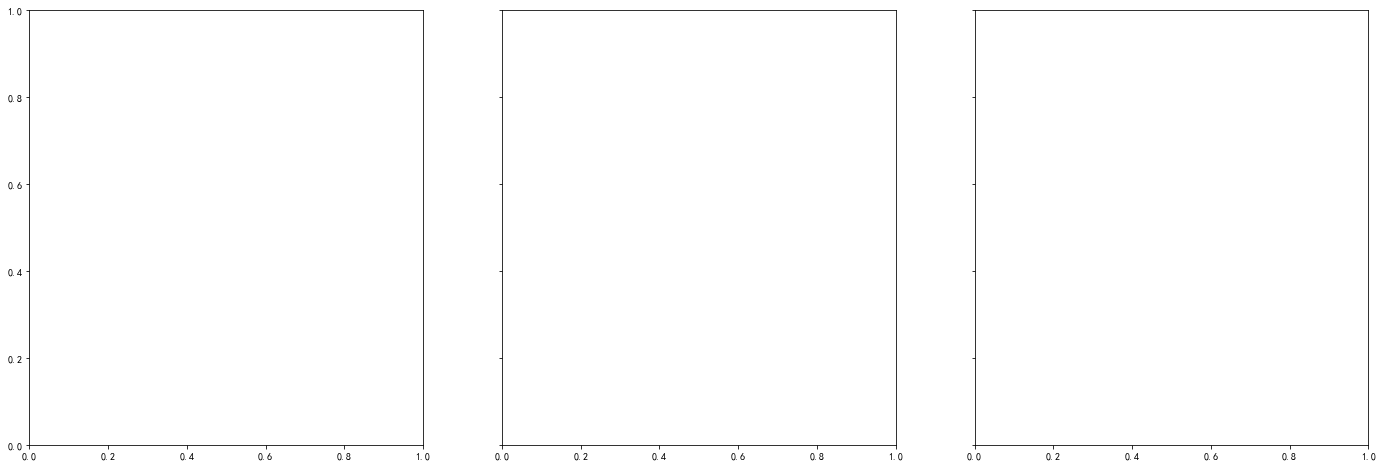

In [73]:
fig,axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

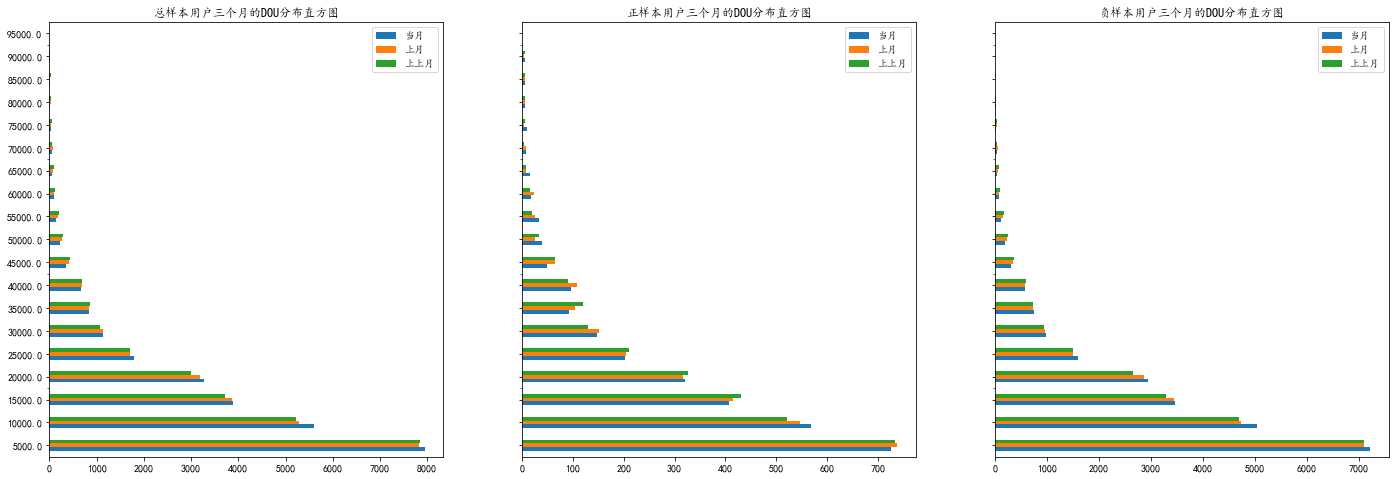

In [74]:
concat_all_data_flow_amnt.plot.barh(legend=True, title='总样本用户三个月的DOU分布直方图', ax=axes[0])
concat_y_data_flow_amnt.plot.barh(legend=True, title='正样本用户三个月的DOU分布直方图', ax=axes[1])
concat_n_data_flow_amnt.plot.barh(legend=True, title='负样本用户三个月的DOU分布直方图', ax=axes[2])
fig

# 对CALL_DRTN的统计分析

In [75]:
all_call_drtn = compulete_count_normalized(df_all.CALL_DRTN, 0,2000,100, '当月')
y_call_drtn = compulete_count_normalized(df_Y.CALL_DRTN, 0, 2000,100, '当月')
n_call_drtn = compulete_count_normalized(df_N.CALL_DRTN, 0, 2000,100, '当月')

all_call_drtn01 = compulete_count_normalized(df_all.CALL_DRTN01, 0,2000,100, '上月')
y_call_drtn01 = compulete_count_normalized(df_Y.CALL_DRTN01, 0, 2000,100, '上月')
n_call_drtn01 = compulete_count_normalized(df_N.CALL_DRTN01, 0, 2000,100, '上月')

all_call_drtn02 = compulete_count_normalized(df_all.CALL_DRTN02, 0,2000,100, '上上月')
y_call_drtn02 = compulete_count_normalized(df_Y.CALL_DRTN02, 0, 2000,100, '上上月')
n_call_drtn02 = compulete_count_normalized(df_N.CALL_DRTN02, 0, 2000,100, '上上月')

In [76]:
concat_all_call_drtn = pd.concat([all_call_drtn.当月, all_call_drtn01.上月, all_call_drtn02.上上月] ,axis=1)
concat_all_call_drtn = concat_all_call_drtn.reindex([(x.right+1) for x in concat_all_call_drtn.index])

concat_y_call_drtn = pd.concat([y_call_drtn.当月, y_call_drtn01.上月, y_call_drtn02.上上月] ,axis=1)
concat_y_call_drtn = concat_y_call_drtn.reindex([(x.right+1) for x in concat_y_call_drtn.index])

concat_n_call_drtn = pd.concat([n_call_drtn.当月, n_call_drtn01.上月, n_call_drtn02.上上月] ,axis=1)
concat_n_call_drtn = concat_n_call_drtn.reindex([(x.right+1) for x in concat_n_call_drtn.index])

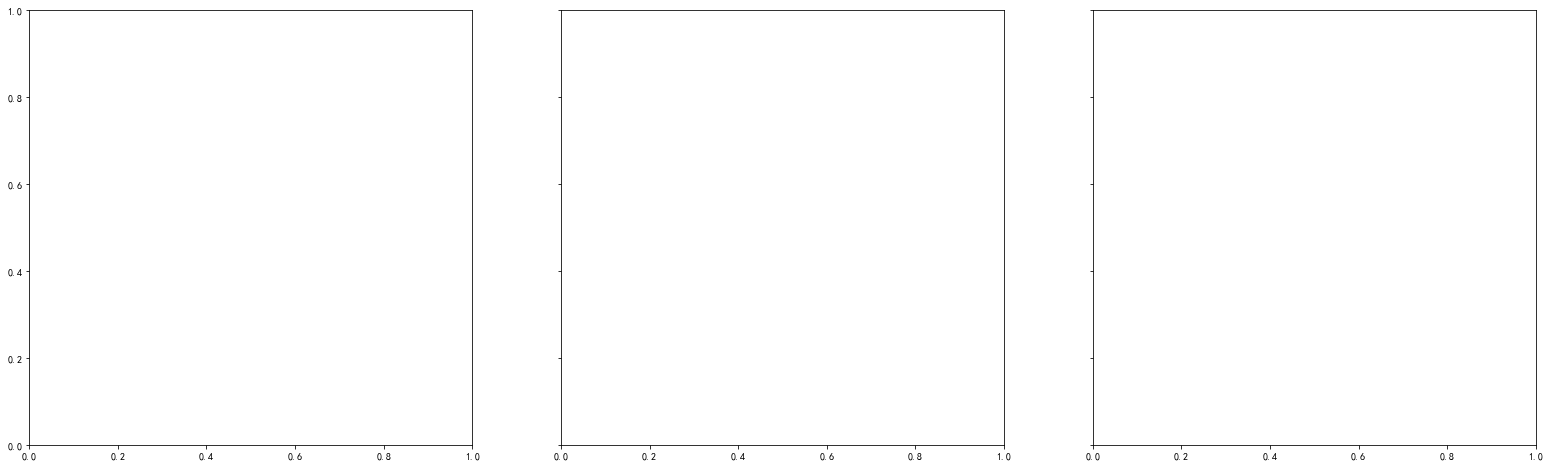

In [77]:
fig,axes = plt.subplots(1, 3, figsize=(27, 8), sharey=True)

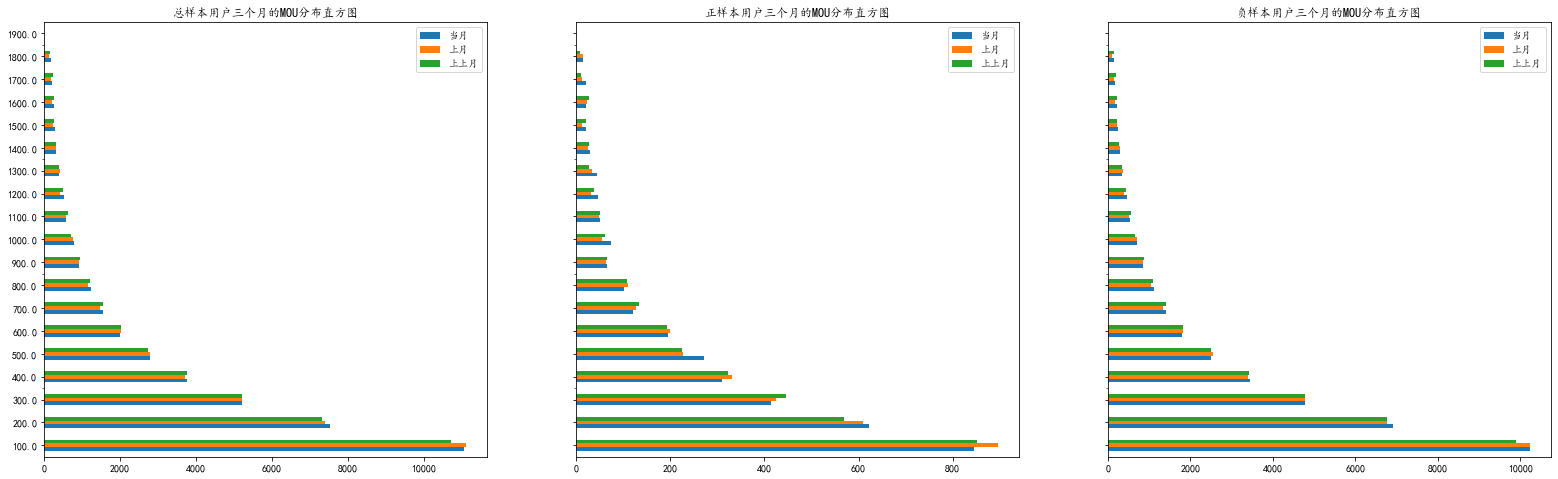

In [78]:
concat_all_call_drtn.plot.barh(legend=True, title='总样本用户三个月的MOU分布直方图', ax=axes[0])
concat_y_call_drtn.plot.barh(legend=True, title='正样本用户三个月的MOU分布直方图', ax=axes[1])
concat_n_call_drtn.plot.barh(legend=True, title='负样本用户三个月的MOU分布直方图', ax=axes[2])
fig

# 对DATA_FLOW_AMNT_PRV的统计分析

In [79]:
all_data_flow_amnt_prv = compulete_count_normalized(df_all.DATA_FLOW_AMNT_PRV, 0,2000,100)
y_data_flow_amnt_prv = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_PRV, 0, 2000,100)
n_data_flow_amnt_prv = compulete_count_normalized(df_N.DATA_FLOW_AMNT_PRV, 0, 2000,100)

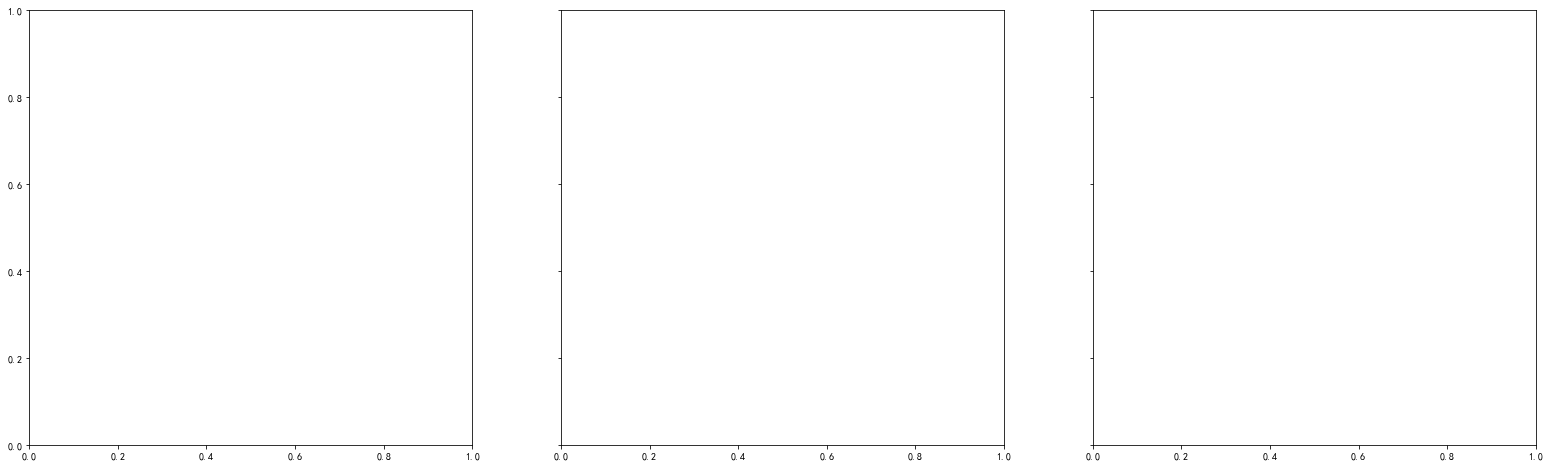

In [80]:
fig,axes = plt.subplots(1, 3, figsize=(27, 8), sharey=True)

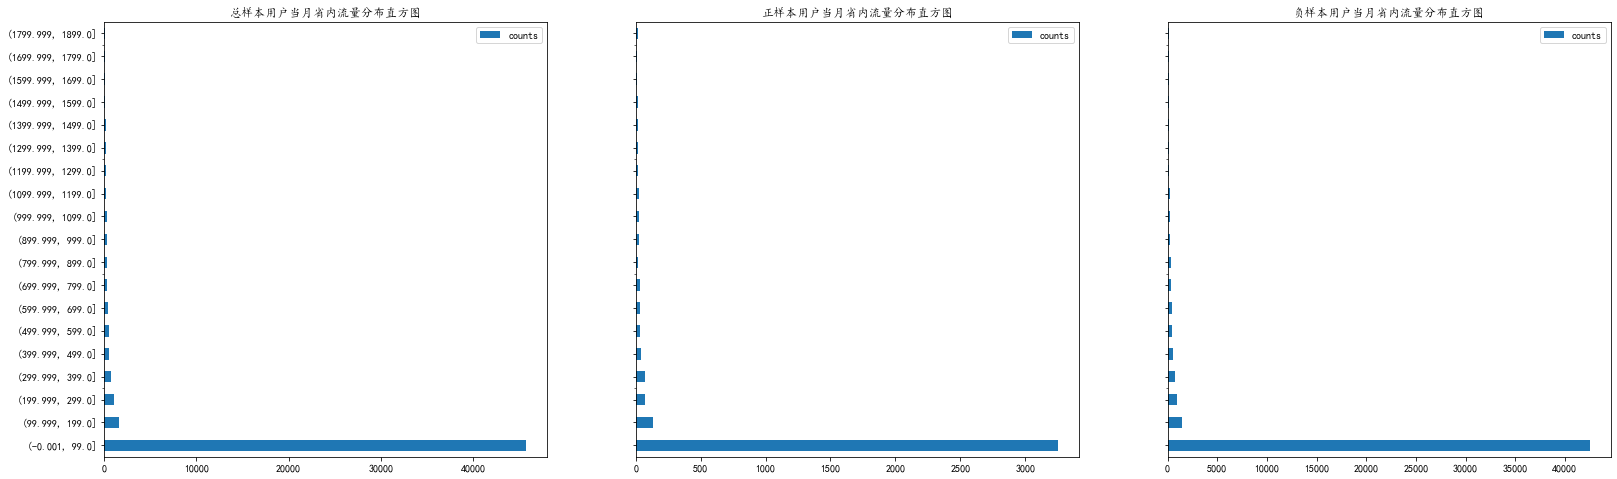

In [81]:
all_data_flow_amnt_prv.plot.barh(y="counts", title='总样本用户当月省内流量分布直方图', ax=axes[0])
y_data_flow_amnt_prv.plot.barh(y="counts", title='正样本用户当月省内流量分布直方图', ax=axes[1])
n_data_flow_amnt_prv.plot.barh(y="counts", title='负样本用户当月省内流量分布直方图', ax=axes[2])
fig

In [82]:
all_data_flow_amnt_prv = compulete_count_normalized(df_all.DATA_FLOW_AMNT_PRV, 0,100,10)
y_data_flow_amnt_prv = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_PRV, 0, 100,10)
n_data_flow_amnt_prv = compulete_count_normalized(df_N.DATA_FLOW_AMNT_PRV, 0, 100,10)

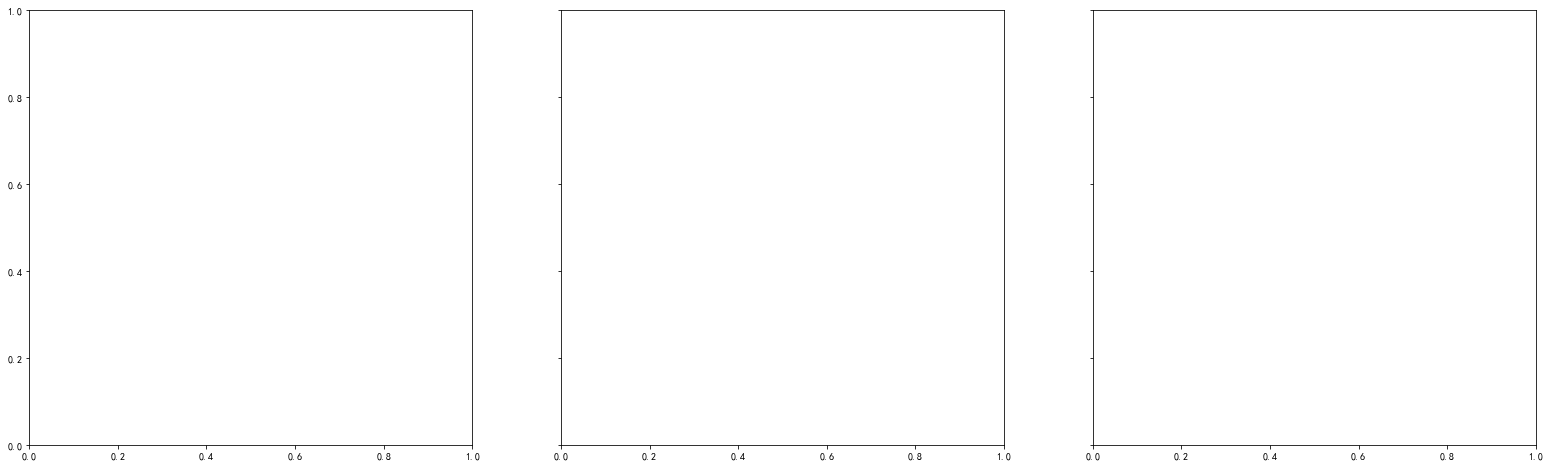

In [83]:
fig,axes = plt.subplots(1, 3, figsize=(27, 8), sharey=True)

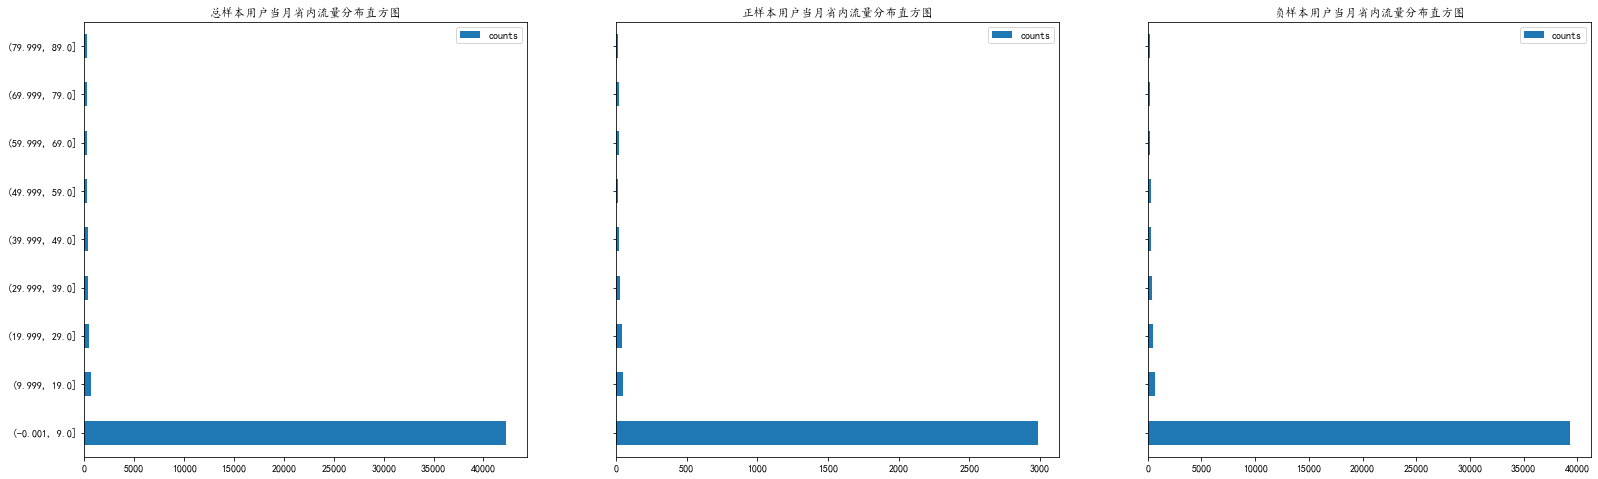

In [84]:
all_data_flow_amnt_prv.plot.barh(y="counts", title='总样本用户当月省内流量分布直方图', ax=axes[0])
y_data_flow_amnt_prv.plot.barh(y="counts", title='正样本用户当月省内流量分布直方图', ax=axes[1])
n_data_flow_amnt_prv.plot.barh(y="counts", title='负样本用户当月省内流量分布直方图', ax=axes[2])
fig

总样本与正样本的用户当月省内流量都集中在10M内，该流量继续细粒度划分意义不大，该特征分析价值不大

# 对DATA_FLOW_AMNT_ROAM_PRV的统计分析

In [85]:
all_data_flow_amnt_roam_prv = compulete_count_normalized(df_all.DATA_FLOW_AMNT_ROAM_PRV, 0, 10000, 500,'当月')
y_data_flow_amnt_roam_prv = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_ROAM_PRV, 0, 10000, 500,'当月')
n_data_flow_amnt_roam_prv = compulete_count_normalized(df_N.DATA_FLOW_AMNT_ROAM_PRV, 0, 10000, 500,'当月')

all_data_flow_amnt_roam_prv01 = compulete_count_normalized(df_all.DATA_FLOW_AMNT_ROAM_PRV01, 0, 10000, 500,'上月')
y_data_flow_amnt_roam_prv01 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_ROAM_PRV01, 0, 10000, 500,'上月')
n_data_flow_amnt_roam_prv01 = compulete_count_normalized(df_N.DATA_FLOW_AMNT_ROAM_PRV01, 0, 10000, 500,'上月')

all_data_flow_amnt_roam_prv02 = compulete_count_normalized(df_all.DATA_FLOW_AMNT_ROAM_PRV02, 0, 10000, 500,'上上月')
y_data_flow_amnt_roam_prv02 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_ROAM_PRV02, 0, 10000, 500,'上上月')
n_data_flow_amnt_roam_prv02 = compulete_count_normalized(df_N.DATA_FLOW_AMNT_ROAM_PRV02, 0, 10000, 500,'上上月')

In [86]:
concat_all_data_flow_amnt_roam_prv = pd.concat([all_data_flow_amnt_roam_prv.当月, 
                                                all_data_flow_amnt_roam_prv01.上月,
                                                all_data_flow_amnt_roam_prv02.上上月] ,axis=1)
concat_all_data_flow_amnt_roam_prv = concat_all_data_flow_amnt_roam_prv.reindex([(x.right+1) for x in concat_all_data_flow_amnt_roam_prv.index])

concat_y_data_flow_amnt_roam_prv = pd.concat([y_data_flow_amnt_roam_prv.当月, 
                                                y_data_flow_amnt_roam_prv01.上月,
                                                y_data_flow_amnt_roam_prv02.上上月] ,axis=1)
concat_y_data_flow_amnt_roam_prv = concat_y_data_flow_amnt_roam_prv.reindex([(x.right+1) for x in concat_y_data_flow_amnt_roam_prv.index])

concat_n_data_flow_amnt_roam_prv = pd.concat([n_data_flow_amnt_roam_prv.当月, 
                                                n_data_flow_amnt_roam_prv01.上月,
                                                n_data_flow_amnt_roam_prv02.上上月] ,axis=1)
concat_n_data_flow_amnt_roam_prv = concat_n_data_flow_amnt_roam_prv.reindex([(x.right+1) for x in concat_n_data_flow_amnt_roam_prv.index])

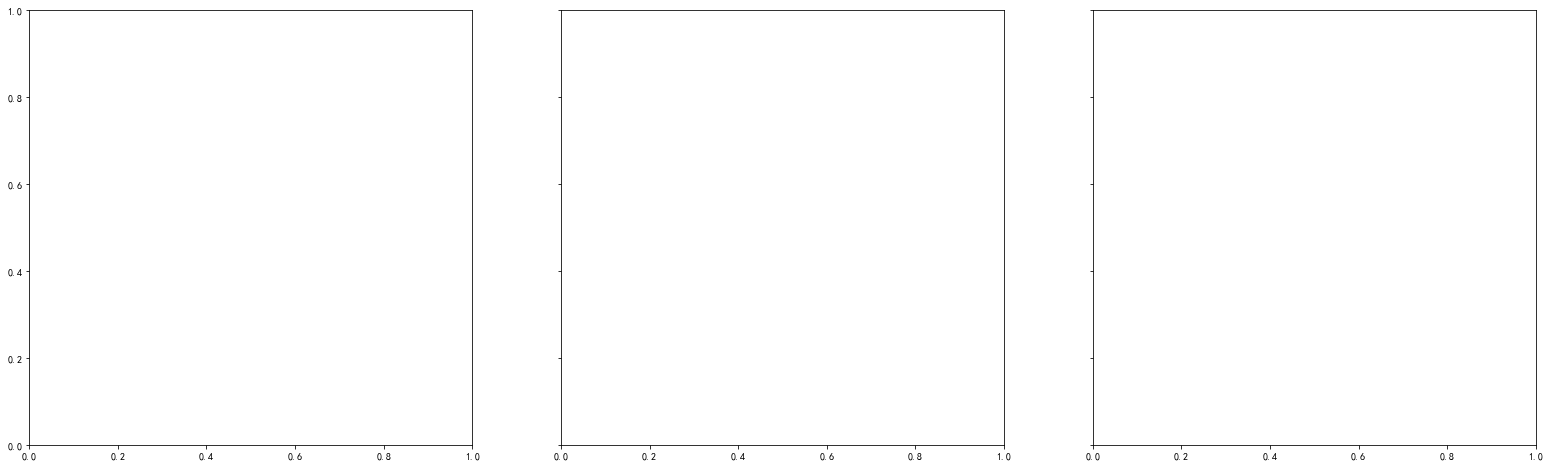

In [87]:
fig,axes = plt.subplots(1, 3, figsize=(27, 8), sharey=True)

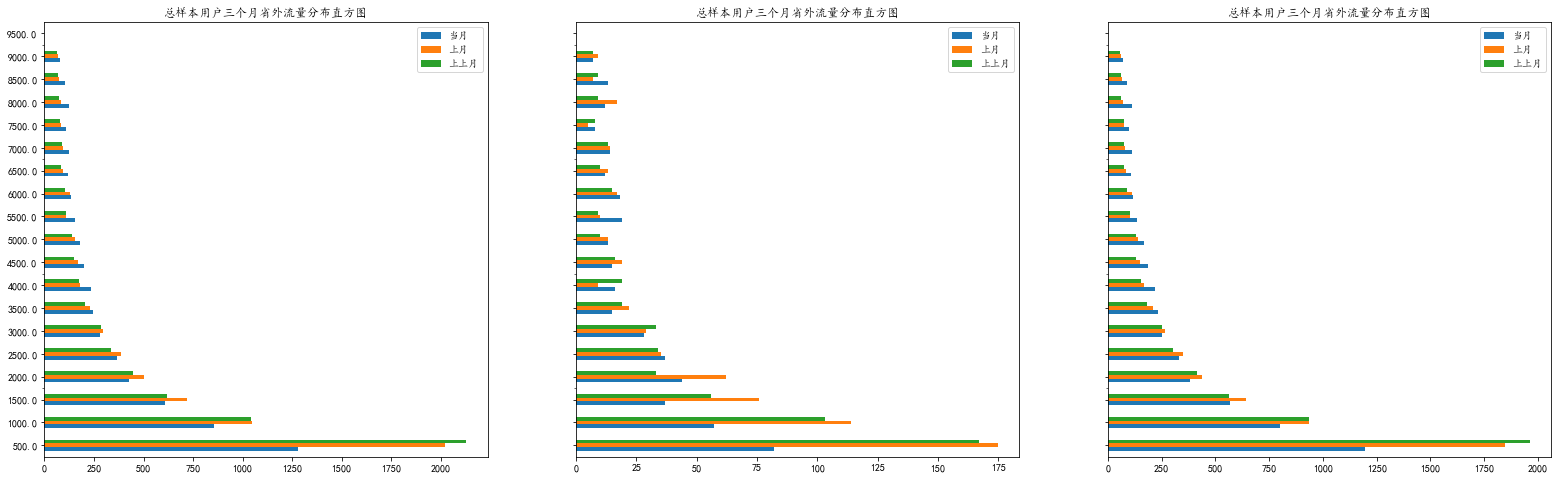

In [88]:
concat_all_data_flow_amnt_roam_prv.plot.barh(legend=True, title='总样本用户三个月省外流量分布直方图',ax=axes[0])
concat_y_data_flow_amnt_roam_prv.plot.barh(legend=True, title='总样本用户三个月省外流量分布直方图',ax=axes[1])
concat_n_data_flow_amnt_roam_prv.plot.barh(legend=True, title='总样本用户三个月省外流量分布直方图',ax=axes[2])
fig

# 对DATA_FLOW_AMNT_5G的统计分析

In [89]:
df_all.DATA_FLOW_AMNT_5G.max()

61726.75

In [93]:
all_data_flow_amnt_5G = compulete_count_normalized(df_all.DATA_FLOW_AMNT_5G, 0,50, 5)
y_data_flow_amnt_5G = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_5G, 0,50, 5)
n_data_flow_amnt_5G = compulete_count_normalized(df_N.DATA_FLOW_AMNT_5G, 0,50, 5)

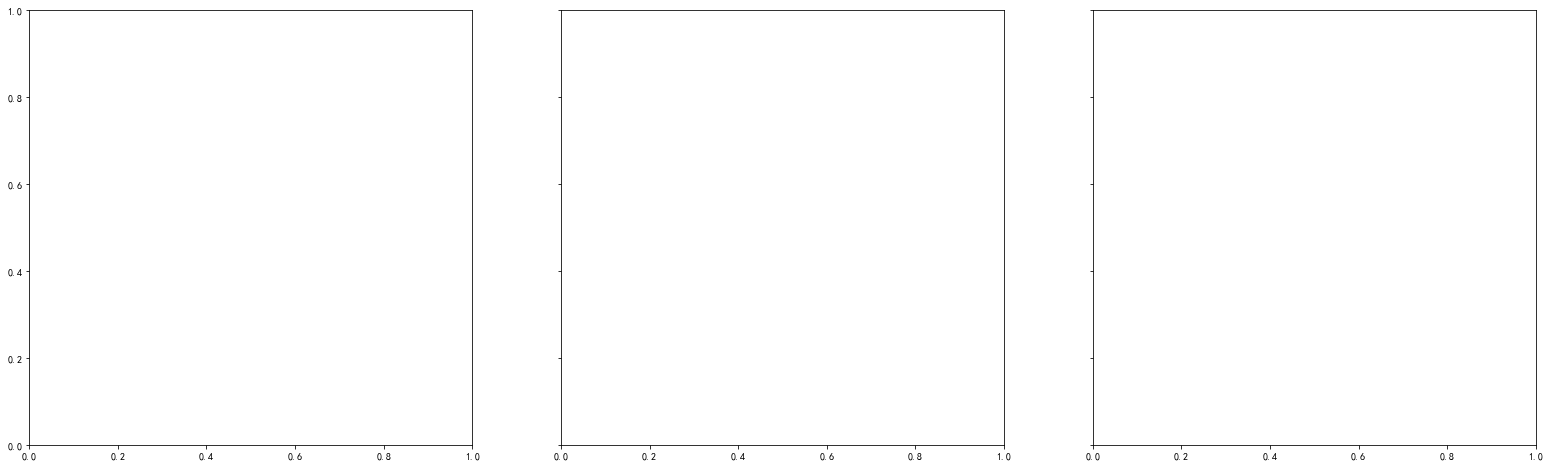

In [94]:
fig,axes = plt.subplots(1, 3, figsize=(27, 8), sharey=True)

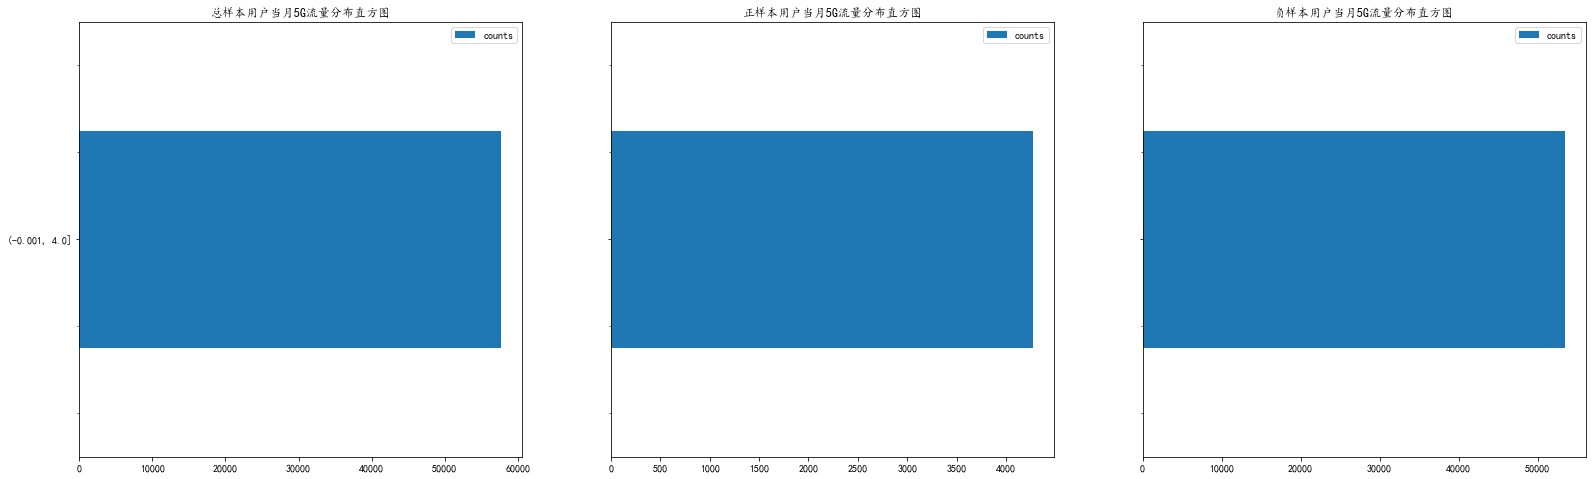

In [95]:
all_data_flow_amnt_5G.plot.barh(y="counts", title='总样本用户当月5G流量分布直方图', ax=axes[0])
y_data_flow_amnt_5G.plot.barh(y="counts", title='正样本用户当月5G流量分布直方图', ax=axes[1])
n_data_flow_amnt_5G.plot.barh(y="counts", title='负样本用户当月5G流量分布直方图', ax=axes[2])
fig

# 对DATA_FLOW_AMNT_4G的统计分析

In [96]:
df_all.DATA_FLOW_AMNT_4G.max()

237053.94

In [97]:
all_data_flow_amnt_4G = compulete_count_normalized(df_all.DATA_FLOW_AMNT_4G, 0,24000, 500)
y_data_flow_amnt_4G = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_4G, 0,24000, 500)
n_data_flow_amnt_4G = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_4G, 0,24000, 500)

In [98]:
all_data_flow_amnt_4G = all_data_flow_amnt_4G.sort_values(by=["counts"], ascending=False).head(20)
y_data_flow_amnt_4G = y_data_flow_amnt_4G.sort_values(by=["counts"], ascending=False).head(15)
n_data_flow_amnt_4G = n_data_flow_amnt_4G.sort_values(by=["counts"], ascending=False).head(15)

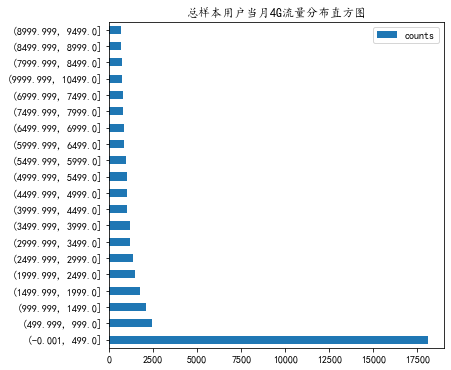

In [99]:
all_data_flow_amnt_4G.plot.barh(y="counts", figsize=(6, 6), title='总样本用户当月4G流量分布直方图')

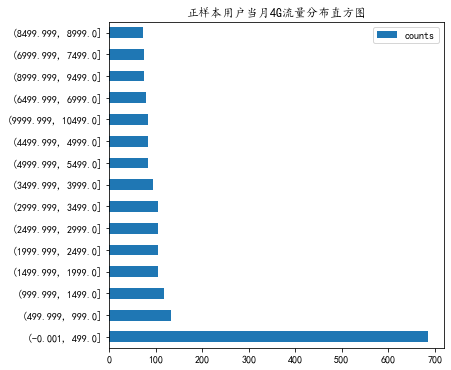

In [100]:
y_data_flow_amnt_4G.plot.barh(y="counts", figsize=(6, 6), title='正样本用户当月4G流量分布直方图')

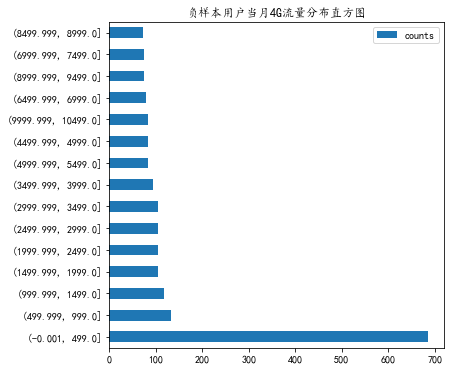

In [101]:
n_data_flow_amnt_4G.plot.barh(y="counts", figsize=(6, 6), title='负样本用户当月4G流量分布直方图')

# 对SMS_COUNT的统计分析

In [102]:
df_all.SMS_COUNT.max()

6284

In [103]:
all_sms_count = compulete_count_normalized(df_all.SMS_COUNT, 0, 24, 3)
y_sms_count = compulete_count_normalized(df_Y.SMS_COUNT, 0, 24, 3)
n_sms_count = compulete_count_normalized(df_N.SMS_COUNT, 0, 24, 3)

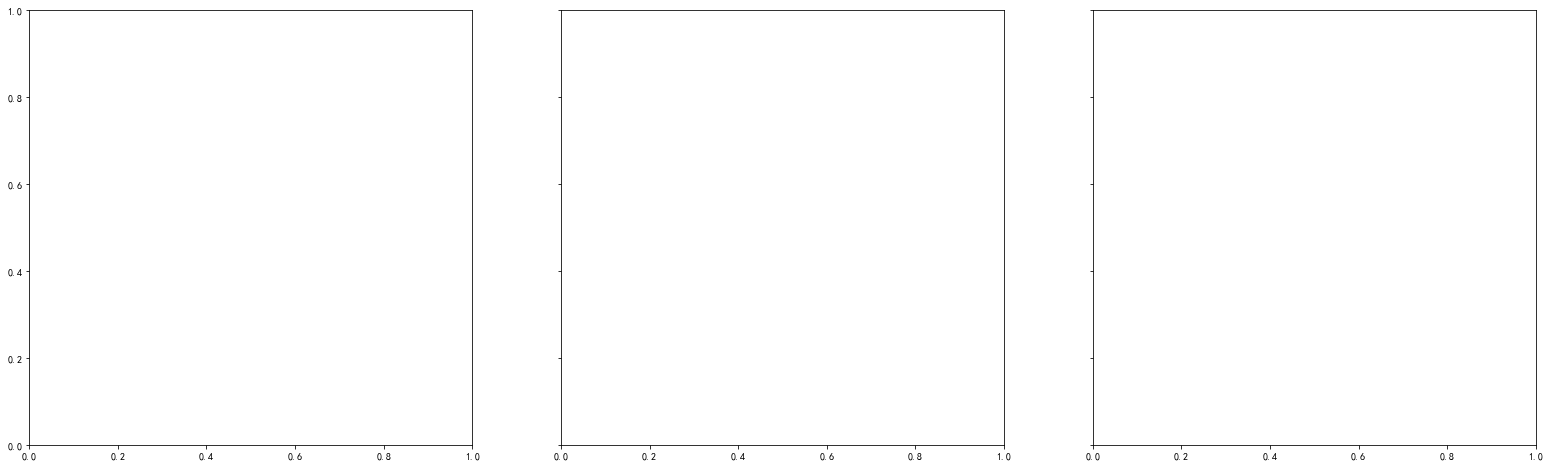

In [104]:
fig,axes = plt.subplots(1, 3, figsize=(27, 8), sharey=True)

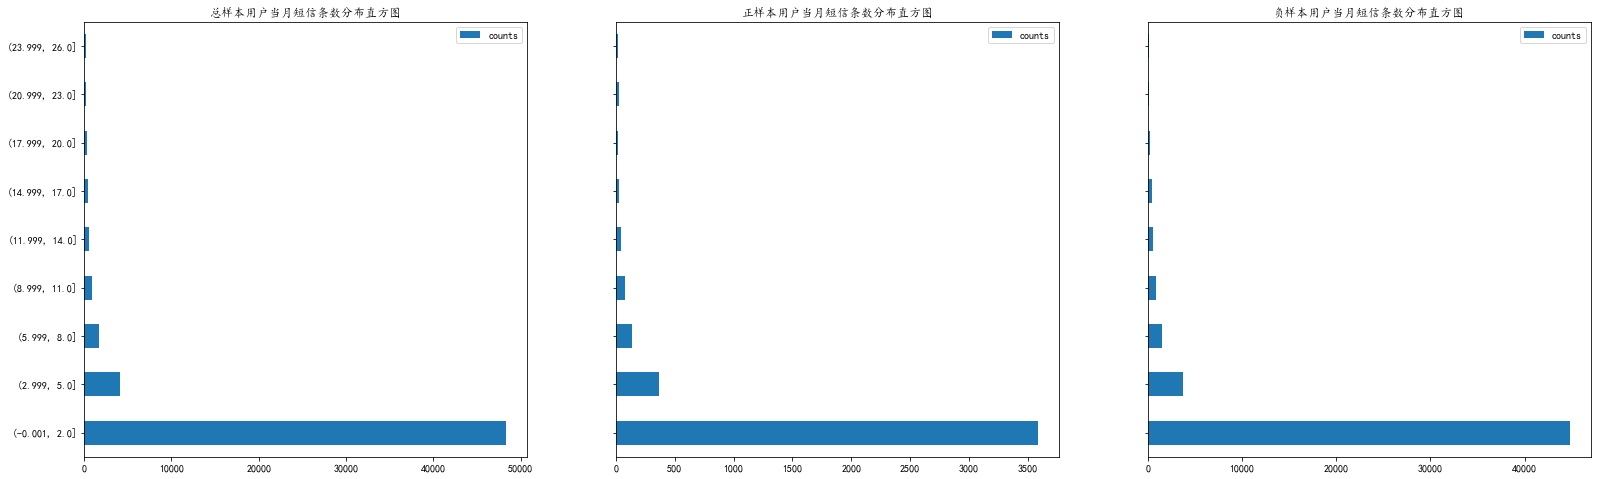

In [105]:
all_sms_count.plot.barh(y="counts", title='总样本用户当月短信条数分布直方图', ax=axes[0])
y_sms_count.plot.barh(y="counts", title='正样本用户当月短信条数分布直方图', ax=axes[1])
n_sms_count.plot.barh(y="counts", title='负样本用户当月短信条数分布直方图', ax=axes[2])
fig

绝大部分用户的每月短信数都在2条左右，该特征价值不大

# 对CALLED_DRTN的统计分析

In [106]:
all_called_drtn = compulete_count_normalized(df_all.CALLED_DRTN, 0, 2000, 100, '当月')
y_called_drtn = compulete_count_normalized(df_Y.CALLED_DRTN, 0, 2000, 100, '当月')
n_called_drtn = compulete_count_normalized(df_N.CALLED_DRTN, 0, 2000, 100, '当月')

all_called_drtn01 = compulete_count_normalized(df_all.CALLED_DRTN01, 0, 2000, 100, '上月')
y_called_drtn01 = compulete_count_normalized(df_Y.CALLED_DRTN01, 0, 2000, 100, '上月')
n_called_drtn01 = compulete_count_normalized(df_N.CALLED_DRTN01, 0, 2000, 100, '上月')

all_called_drtn02 = compulete_count_normalized(df_all.CALLED_DRTN02, 0, 2000, 100, '上上月')
y_called_drtn02 = compulete_count_normalized(df_Y.CALLED_DRTN02, 0, 2000, 100, '上上月')
n_called_drtn02 = compulete_count_normalized(df_N.CALLED_DRTN02, 0, 2000, 100, '上上月')

all_called_drtn03 = compulete_count_normalized(df_all.CALLED_DRTN03, 0, 2000, 100, '前三月')
y_called_drtn03 = compulete_count_normalized(df_Y.CALLED_DRTN03, 0, 2000, 100, '前三月')
n_called_drtn03 = compulete_count_normalized(df_N.CALLED_DRTN03, 0, 2000, 100, '前三月')

In [107]:
concat_all_called_drtn = pd.concat([all_called_drtn.当月, 
                                    all_called_drtn01.上月,
                                    all_called_drtn02.上上月,
                                   all_called_drtn03.前三月] ,axis=1)
concat_all_called_drtn = concat_all_called_drtn.reindex([(x.right+1) for x in concat_all_called_drtn.index])

concat_y_called_drtn = pd.concat([y_called_drtn.当月, 
                                    y_called_drtn01.上月,
                                    y_called_drtn02.上上月,
                                   y_called_drtn03.前三月] ,axis=1)
concat_y_called_drtn = concat_y_called_drtn.reindex([(x.right+1) for x in concat_y_called_drtn.index])

concat_n_called_drtn = pd.concat([n_called_drtn.当月, 
                                    n_called_drtn01.上月,
                                    n_called_drtn02.上上月,
                                   n_called_drtn03.前三月] ,axis=1)
concat_n_called_drtn = concat_n_called_drtn.reindex([(x.right+1) for x in concat_n_called_drtn.index])

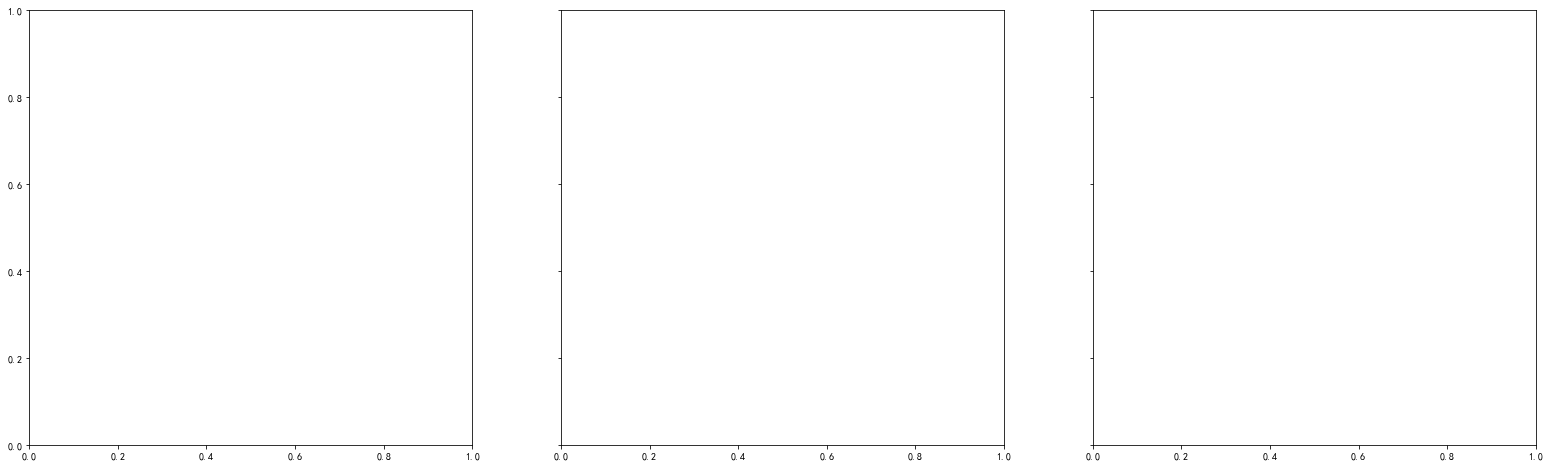

In [108]:
fig,axes = plt.subplots(1, 3, figsize=(27, 8), sharey=True)

In [109]:
concat_all_called_drtn.plot.barh( title='总样本用户被叫时长分布直方图', ax=axes[0])
concat_y_called_drtn.plot.barh( title='正样本用户被叫时长分布直方图', ax=axes[1])
concat_n_called_drtn.plot.barh( title='负样本用户被叫时长分布直方图', ax=axes[2])

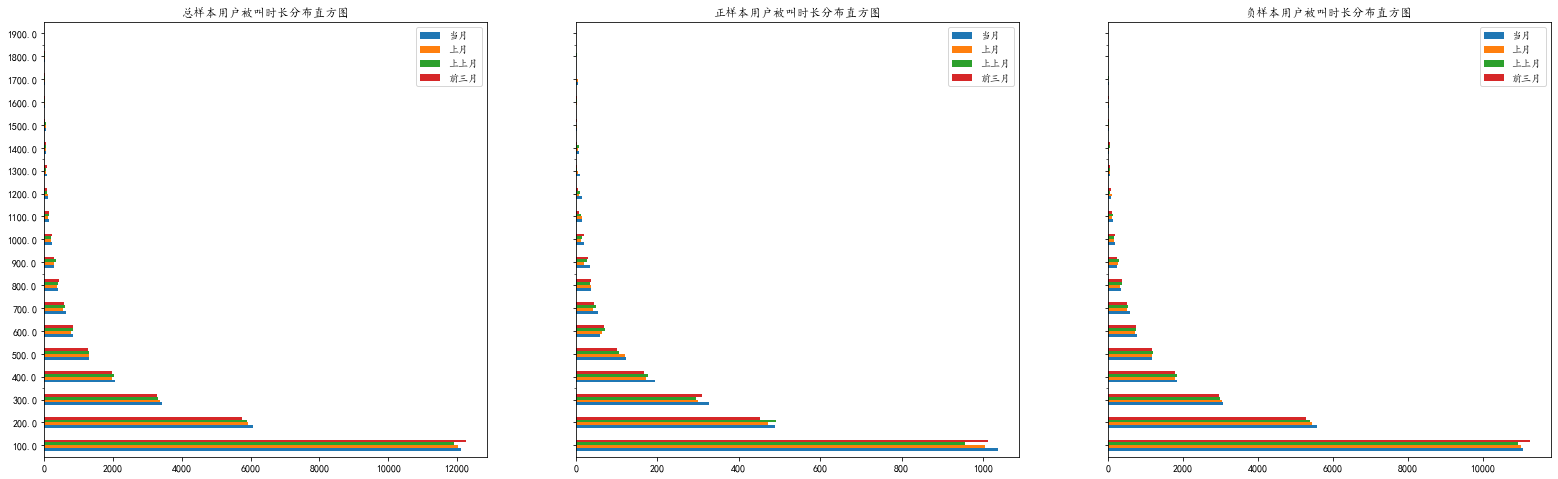

In [110]:
fig

# 对CALL_COUNT的统计分析

In [111]:
df_all.CALL_COUNT.max()

2429

In [112]:
all_call_count = compulete_count_normalized(df_all.CALL_COUNT, 0, 1000, 50)
y_call_count = compulete_count_normalized(df_Y.CALL_COUNT, 0, 1000, 50)
n_call_count = compulete_count_normalized(df_N.CALL_COUNT, 0, 1000, 50)

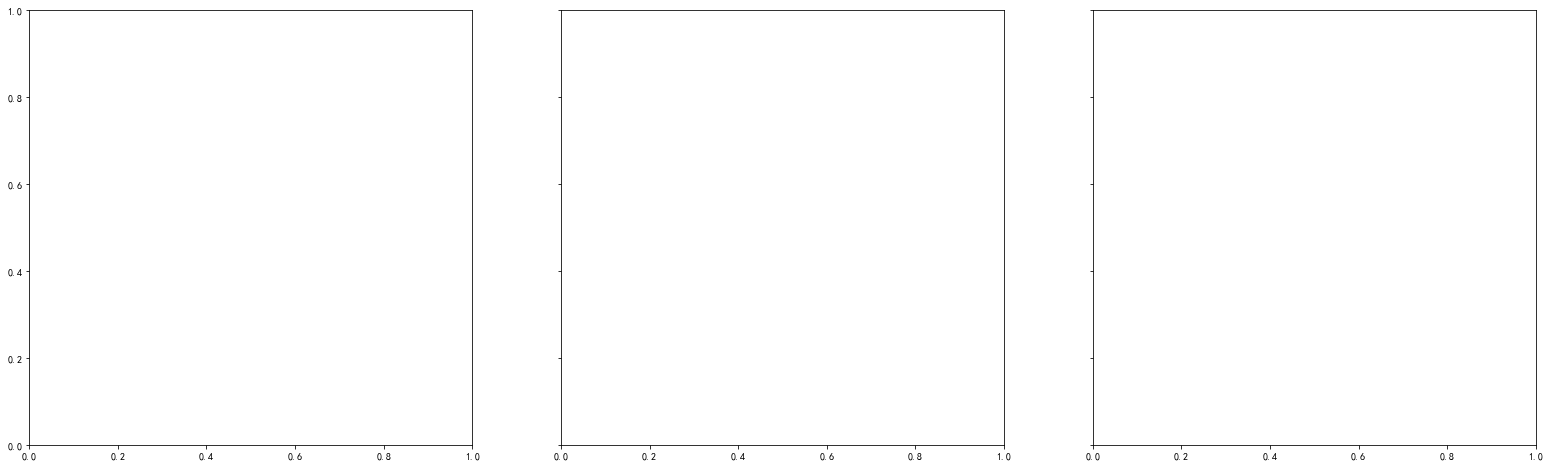

In [113]:
fig,axes = plt.subplots(1, 3, figsize=(27, 8), sharey=True)

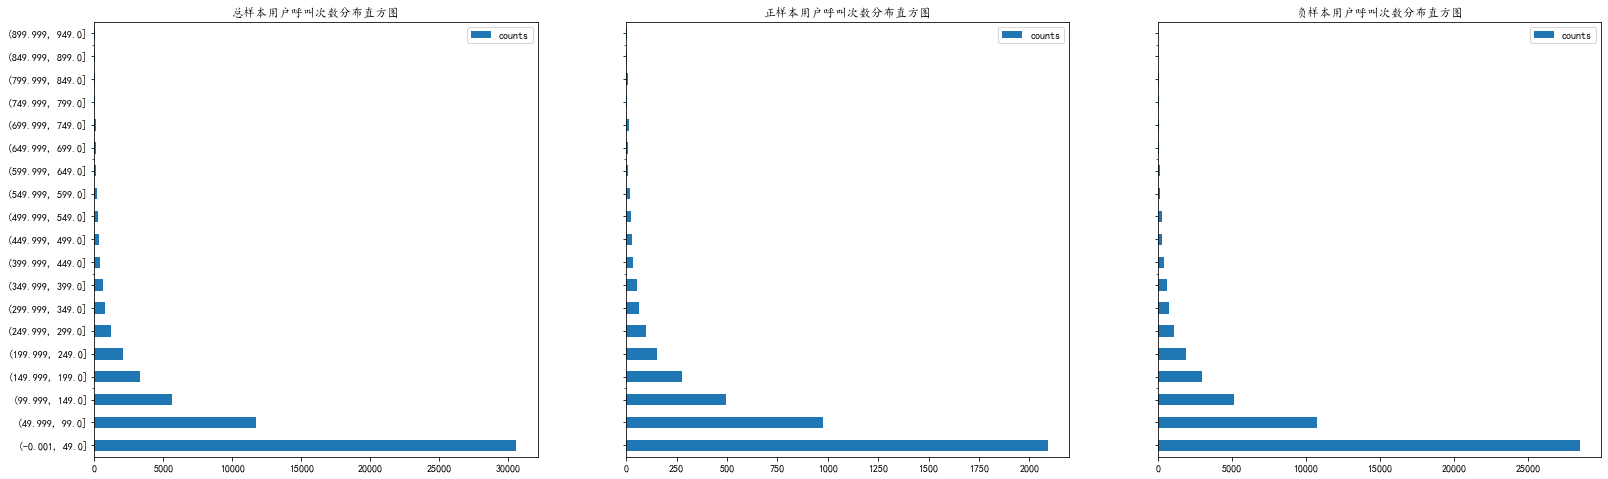

In [114]:
all_call_count.plot.barh(y="counts", title='总样本用户呼叫次数分布直方图', ax=axes[0])
y_call_count.plot.barh(y="counts", title='正样本用户呼叫次数分布直方图', ax=axes[1])
n_call_count.plot.barh(y="counts", title='负样本用户呼叫次数分布直方图', ax=axes[2])
fig

# 对CALLING_DRTN的统计分析

In [118]:
all_calling_drtn01 = compulete_count_normalized(df_all.CALLING_DRTN01, 0, 1500, 100, '上月')
y_calling_drtn01 = compulete_count_normalized(df_Y.CALLING_DRTN01, 0, 1500, 100, '上月')
n_calling_drtn01 = compulete_count_normalized(df_N.CALLING_DRTN01, 0, 1500, 100, '上月')

all_calling_drtn02 = compulete_count_normalized(df_all.CALLING_DRTN02, 0, 1500, 100, '上上月')
y_calling_drtn02 = compulete_count_normalized(df_Y.CALLING_DRTN02, 0, 1500, 100, '上上月')
n_calling_drtn02 = compulete_count_normalized(df_N.CALLING_DRTN02, 0, 1500, 100, '上上月')

all_calling_drtn03 = compulete_count_normalized(df_all.CALLING_DRTN03, 0, 1500, 100, '前三月')
y_calling_drtn03 = compulete_count_normalized(df_Y.CALLING_DRTN03, 0, 1500, 100, '前三月')
n_calling_drtn03 = compulete_count_normalized(df_N.CALLING_DRTN03, 0, 1500, 100, '前三月')

In [119]:
concat_all_calling_drtn = pd.concat([                                   
                                    all_calling_drtn01.上月,
                                   all_calling_drtn02.上上月,
                                   all_calling_drtn03.前三月] ,axis=1)
concat_all_calling_drtn = concat_all_calling_drtn.reindex([(x.right+1) for x in concat_all_calling_drtn.index])

concat_y_calling_drtn = pd.concat([                                    
                                    y_calling_drtn01.上月,
                                   y_calling_drtn02.上上月,
                                    y_calling_drtn03.前三月] ,axis=1)
concat_y_calling_drtn = concat_y_calling_drtn.reindex([(x.right+1) for x in concat_y_calling_drtn.index])

concat_n_calling_drtn = pd.concat([
                                    n_calling_drtn01.上月,
                                   n_calling_drtn02.上上月,
                                   n_calling_drtn03.前三月] ,axis=1)
concat_n_calling_drtn = concat_n_calling_drtn.reindex([(x.right+1) for x in concat_n_calling_drtn.index])

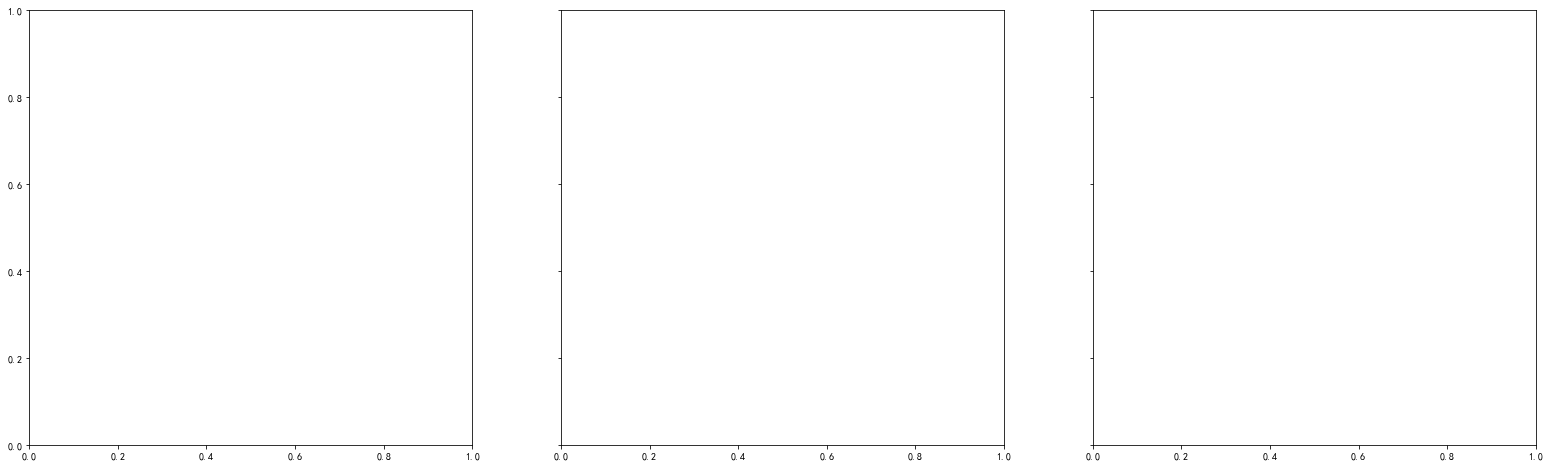

In [120]:
fig,axes = plt.subplots(1, 3, figsize=(27, 8), sharey=True)

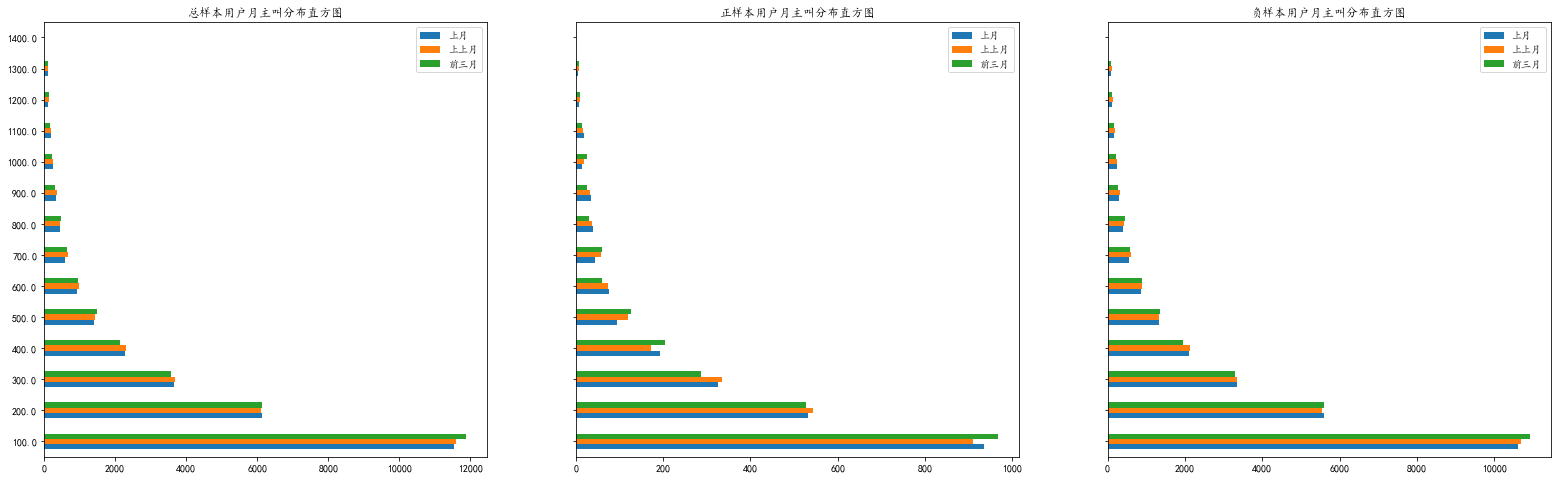

In [121]:
concat_all_calling_drtn.plot.barh(title='总样本用户月主叫分布直方图', ax=axes[0])
concat_y_calling_drtn.plot.barh(title='正样本用户月主叫分布直方图', ax=axes[1])
concat_n_calling_drtn.plot.barh(title='负样本用户月主叫分布直方图', ax=axes[2])
fig

# 依据部分特征进行筛选

In [122]:
all_if_touch = compulete_count_normalized_categories(df_all.IF_TOUCH)
all_if_touch

,counts,normalized
0,53425,0.924516
1,4362,0.075484


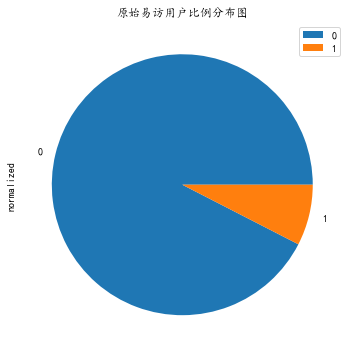

In [123]:
all_if_touch.plot.pie(y="normalized", figsize=(6, 6), title='原始易访用户比例分布图')

In [124]:
df_test = df_all[(df_all['AGE_SEG']>=20) & (df_all['AGE_SEG']<=60)
                 & (df_all['IF_SCHOOL']==0) & (df_all['IF_GROUP']==0)
                 & (df_all['BRD_RAX']>=90)
                 & (df_all['IF_BRD']==1) & (df_all['IF_ITV']==1)]
all_if_touch_test = compulete_count_normalized_categories(df_test.IF_TOUCH)
all_if_touch_test

,counts,normalized
0,2206,0.603722
1,1448,0.396278


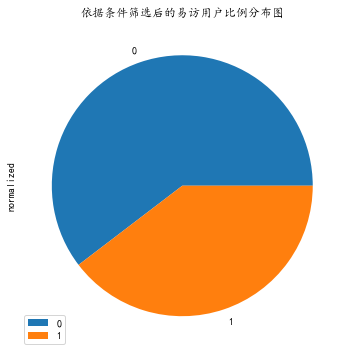

In [125]:
all_if_touch_test.plot.pie(y="normalized", figsize=(6, 6), title='依据条件筛选后的易访用户比例分布图')